In [7]:
import pandas as pd # 데이터프레임
import numpy as np # 수치 계산

import matplotlib.pyplot as plt # 데이터 시각화
import matplotlib # 이하동문
%matplotlib inline
# 주피터 전용 그래프 시각화

import seaborn as sns # # matplotlib 데이터 시각화 라이브러리

import warnings # 경고 메시지 관리
warnings.filterwarnings(action='ignore') # 경고 무시
import platform # 현재 시스템의 운영체제 및 환경 정보를 가져오기 위해?

# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

# 그래프에서 음수 기호 유니코드 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
# 데이터 프레임 출력시 모든 열이 표시되도록 설정
pd.set_option('display.max_columns', None)

In [8]:
df_all = pd.read_csv('/home/piai/Downloads/final/bat_dataset.csv', encoding='euc-kr')
df_all.head()
# bat_process와 bat_tat를 합친 파일인 bat_total을 읽어옴

lot_id    tray_id  rta1_tat  hta1_tat  rta2_tat  ocv1_tat  c1_tat  \
0  LOT-101  TRAY-1063    217383     86541     48349       119    3581   
1  LOT-101  TRAY-1063    217383     86541     48349       119    3581   
2  LOT-101  TRAY-1063    217383     86541     48349       119    3581   
3  LOT-101  TRAY-1063    217383     86541     48349       119    3581   
4  LOT-101  TRAY-1063    217383     86541     48349       119    3581   

   dc1_tat  c2_tat  dc2_tat  c3_tat  dc3_tat  c4_tat  ocv2_tat     cell_id  \
0      404     447      405    1677     3908    3483       118  CELL-11646   
1      404     447      405    1677     3908    3483       118  CELL-11647   
2      404     447      405    1677     3908    3483       118  CELL-11648   
3      404     447      405    1677     3908    3483       118  CELL-11649   
4      404     447      405    1677     3908    3483       118  CELL-11650   

  judge            dt_start  rta1_cell_no rta1_box_col rta1_box_row  \
0    양품  25NOV2023:18:37:30            13          02열          27연   
1    양품  25NOV2023:18:37:30            11          02열          27연   
2    양품  25NOV2023:18:37:30             7          02열          27연   
3    양품  25NOV2023:18:37:30            17          02열          27연   
4    양품  25NOV2023:18:37:30             1          02열          27연   

  rta1_box_dan hta1_box_col hta1_box_row hta1_box_dan rta2_box_col  \
0          03단          02열          12연          09단          07열   
1          03단          02열          12연          09단          07열   
2          03단          02열          12연          09단          07열   
3          03단          02열          12연          09단          07열   
4          03단          02열          12연          09단          07열   

  rta2_box_row rta2_box_dan  ocv1_ocv ocv1_box_col ocv1_box_dan  c1_curr_end  \
0          45연          02단      3340          16열          01단         6800   
1          45연          02단      3340          16열          01단         6799   
2          45연          02단      3340          16열          01단         6801   
3          45연          02단      3339          16열          01단         6799   
4          45연          02단      3341          16열          01단         6801   

   c1_voltage_avg  c1_capa  c1_ccval  c1_time_cc c1_box_col c1_box_dan  \
0            3780     6513      6513        3450        16열        01단   
1            3780     6497      6497        3442        16열        01단   
2            3780     6510      6510        3448        16열        01단   
3            3779     6521      6521        3455        16열        01단   
4            3780     6497      6497        3441        16열        01단   

   c1_temp_avg  dc1_curr_end  dc1_voltage_avg  dc1_capa dc1_box_col  \
0          276          6799             4111       544         16열   
1          276          6800             4111       545         16열   
2          276          6800             4111       544         16열   
3          276          6799             4112       544         16열   
4          276          6799             4110       544         16열   

  dc1_box_dan  dc1_temp_avg  dc1_capafit  c2_curr_end  c2_voltage_avg  \
0         01단           271          537         6801            4148   
1         01단           271          538         6801            4147   
2         01단           271          537         6801            4148   
3         01단           271          537         6800            4148   
4         01단           271          537         6801            4147   

   c2_capa  c2_ccval  c2_time_cc c2_box_col c2_box_dan  c2_temp_avg  \
0      608       608         323        16열        01단          272   
1      612       612         325        16열        01단          272   
2      613       613         326        16열        01단          272   
3      608       608         323        16열        01단          272   
4      613       613         326        16열        01단          272   

   dc2_curr_end  dc2_voltage_

In [9]:
 df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29812 entries, 0 to 29811
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lot_id           29812 non-null  object 
 1   tray_id          29812 non-null  object 
 2   rta1_tat         29812 non-null  int64  
 3   hta1_tat         29812 non-null  int64  
 4   rta2_tat         29812 non-null  int64  
 5   ocv1_tat         29812 non-null  int64  
 6   c1_tat           29812 non-null  int64  
 7   dc1_tat          29812 non-null  int64  
 8   c2_tat           29812 non-null  int64  
 9   dc2_tat          29812 non-null  int64  
 10  c3_tat           29812 non-null  int64  
 11  dc3_tat          29812 non-null  int64  
 12  c4_tat           29812 non-null  int64  
 13  ocv2_tat         29812 non-null  int64  
 14  cell_id          29812 non-null  object 
 15  judge            29812 non-null  object 
 16  dt_start         29812 non-null  object 
 17  rta1_cell_no

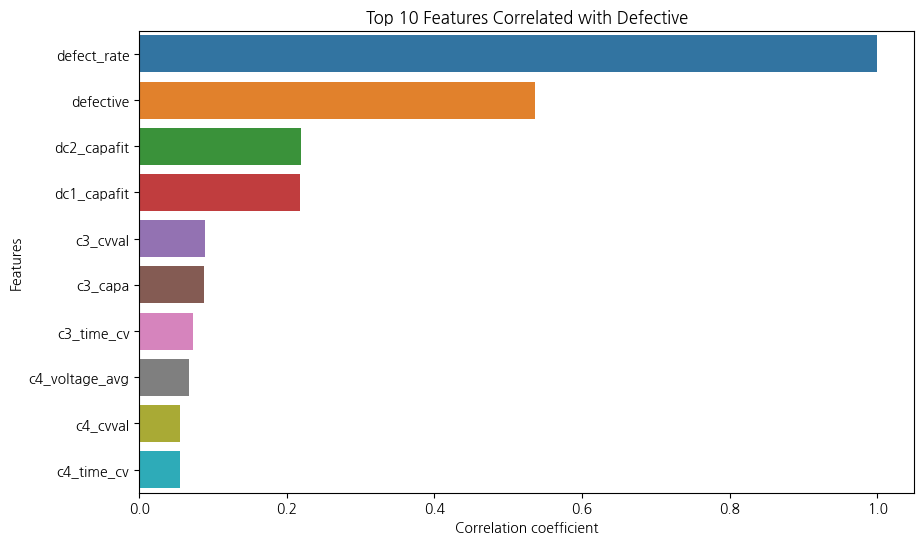

defect_rate       1.000000
defective         0.536715
dc2_capafit       0.218735
dc1_capafit       0.217379
c3_cvval          0.088706
c3_capa           0.088490
c3_time_cv        0.073107
c4_voltage_avg    0.067342
c4_cvval          0.055940
c4_time_cv        0.054880
Name: defect_rate, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'defective'라는 목표 변수와 데이터셋 내의 다른 숫자형 변수들 사이의 상관관계를 확인합니다.
correlation_matrix = df_all.corr()

# 'defective' 변수와 다른 변수들 간의 상관관계 값을 계산합니다.
correlation_with_defective = correlation_matrix['defect_rate'].sort_values(ascending=False)

# 'defective'와 상관관계가 가장 높은 상위 10개의 특성 시각화:
top_correlated_features = correlation_with_defective.head(10).index

# 상관관계 그래프 그리기:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_defective[top_correlated_features], y=top_correlated_features)
plt.title('Top 10 Features Correlated with Defective')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

# 상관관계 값 표시:
correlation_with_defective[top_correlated_features]

In [13]:
'defective'에 대한 전체 상관 행렬 계산:
correlation_with_defective = correlation_matrix['defect_rate'].sort_values(ascending=False)

상관관계 값 표시:
correlation_with_defective



defect_rate        1.000000
defective          0.536715
dc2_capafit        0.218735
dc1_capafit        0.217379
c3_cvval           0.088706
c3_capa            0.088490
c3_time_cv         0.073107
c4_voltage_avg     0.067342
c4_cvval           0.055940
c4_time_cv         0.054880
c3_voltage_avg     0.051568
c3_tat             0.045775
rta1_tat           0.044942
c3_ccval           0.044192
c3_time_cc         0.043658
c1_voltage_avg     0.042634
c1_curr_end        0.032446
dc3_curr_end       0.021354
hta1_tat           0.013248
ocv2_ocv           0.011582
dc1_capa           0.007465
ocv2_tat           0.004616
c4_curr_end        0.001477
rta1_cell_no       0.000865
ocv1_tat           0.000268
c3_curr_end       -0.000812
dc2_capa          -0.002376
c2_ccval          -0.004133
c2_capa           -0.004133
c2_time_cc        -0.004485
c2_curr_end       -0.007286
dc2_curr_end      -0.009371
dc1_curr_end      -0.010214
c2_voltage_avg    -0.011897
c2_tat            -0.013817
c4_tat            -0

In [15]:
num_columns = df_all.shape[1]
num_columns


92

# 상관계수 절대값 0.1(0.2)보다 작은 것들은 날리기로한다.

In [27]:
# Remove columns with absolute correlation less than 0.1 with 'defective'
filtered_columns = correlation_with_defective[correlation_with_defective.abs() >= 0.1].index.tolist()

# Filter the dataframe
filtered_df_all = df_all [filtered_columns]

# Display the filtered dataframe's first few rows to ensure correctness
filtered_df_all.head()

defect_rate  defective  dc2_capafit  dc1_capafit  dc3_temp_avg  \
0          0.0          0          536          537           271   
1          0.0          0          536          538           271   
2          0.0          0          536          537           271   
3          0.0          0          536          537           271   
4          0.0          0          536          537           271   

   c4_temp_avg  c1_temp_avg  c3_temp_avg  dc1_temp_avg  c2_temp_avg  \
0          270          276          273           271          272   
1          270          276          273           271          272   
2          270          276          273           271          272   
3          270          276          273           271          272   
4          270          276          273           271          272   

   dc2_temp_avg  
0           274  
1           274  
2           274  
3           274  
4           274

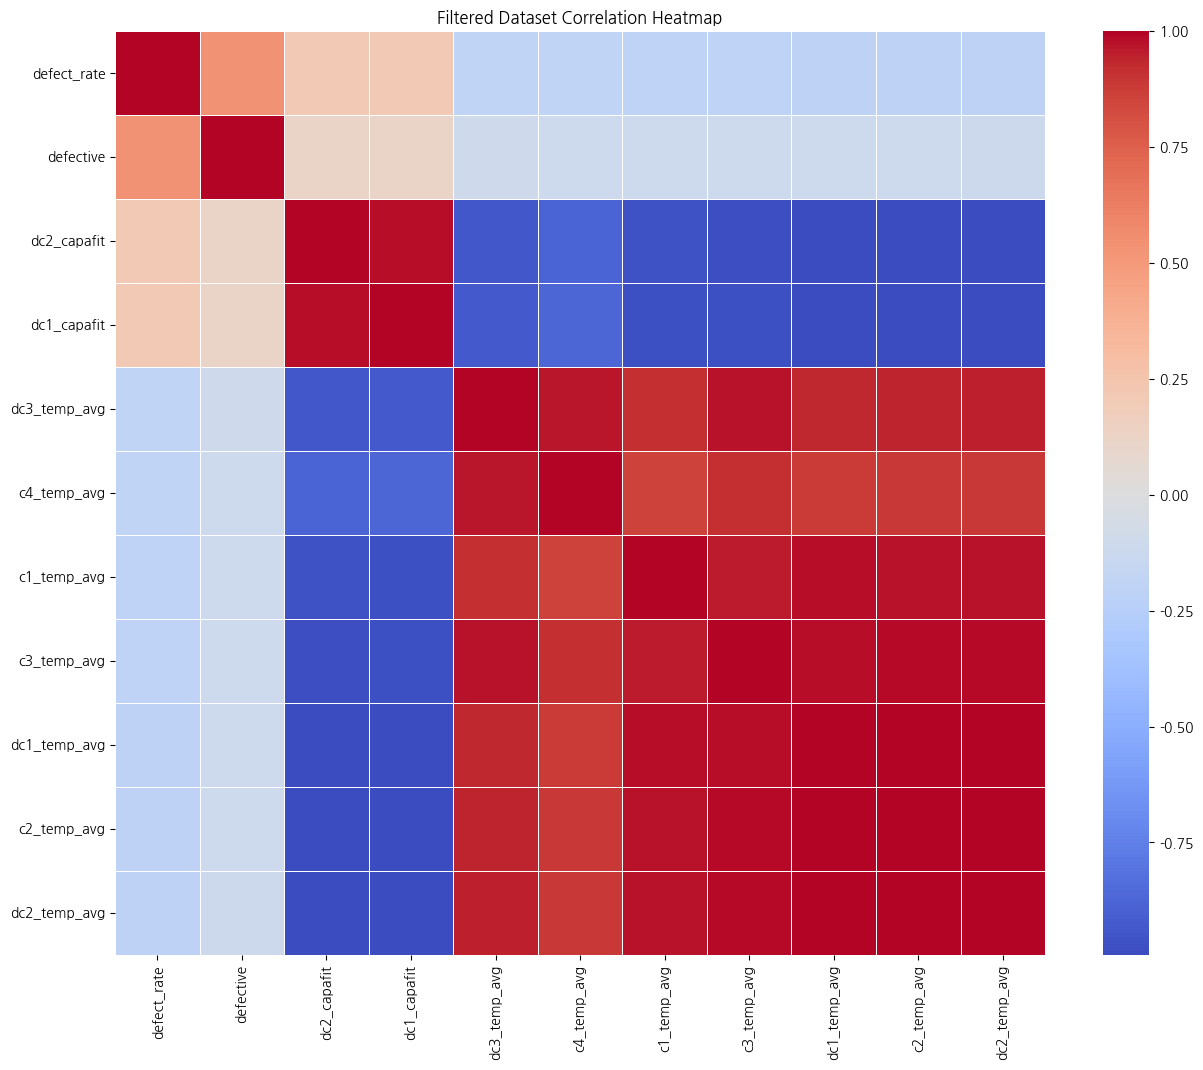

In [28]:

plt.figure(figsize=(15, 12))
sns.heatmap(filtered_df_all .corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Dataset Correlation Heatmap')
plt.show()


# 카이제곱

In [30]:
from scipy.stats import chi2_contingency

# Function to perform Chi-square test and return the result
def chi_square_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Perform Chi-square test for each categorical variable against 'judge'
results = {}
categorical_vars_to_test = ['lot_id', 'tray_id', 'cell_id']

for var in categorical_vars_to_test:
    chi2, p = chi_square_test(df_all, var, 'judge')
    results[var] = {'Chi-square Statistic': chi2, 'p-value': p}

# Display the results
results

{'lot_id': {'Chi-square Statistic': 357.1652666517117,
  'p-value': 4.103990469679458e-51},
 'tray_id': {'Chi-square Statistic': 8587.724238842618, 'p-value': 0.0},
 'cell_id': {'Chi-square Statistic': 29812.0, 'p-value': 0.4972769911397494}}

In [20]:
import pandas as pd
import statsmodels.api as sm

X_lot_id = pd.get_dummies(df_all['lot_id'], drop_first=True)

# Prepare the dependent variable (judge)
y_judge = pd.get_dummies(df_all['judge'], drop_first=True)

# Add a constant to the model
X_lot_id = sm.add_constant(X_lot_id)

# Fit the logistic regression model
logit_model_lot_id = sm.Logit(y_judge, X_lot_id)
result_lot_id = logit_model_lot_id.fit()

# Display the summary of the logistic regression model
result_lot_id.summary()


         Current function value: 0.033288
         Iterations: 35


/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     양품   No. Observations:                29812
Model:                          Logit   Df Residuals:                    29768
Method:                           MLE   Df Model:                           43
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                     inf
Time:                        00:08:30   Log-Likelihood:                -992.39
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4601      0.711      6.271      0.000       3.066       5.854
LOT-102       -1.2038      0.744     -1.619      0.105      -2.661       0.254
LOT-103       -1.0821      0.755     -1.433      0.152      -2.562       0.398
LOT-104        0.5074      0.917      0.553      0.580      -1.291       2.305
LOT-105       -1.1037      0.755     -1.461      0.144      -2.584       0.377
LOT-106       -1.5555      0.735     -2.117      0.034      -2.996      -0.116
LOT-107       -0.6624      0.758     -0.874      0.382      -2.147       0.822
LOT-108       -1.5467      0.735     -2.105      0.035      -2.987      -0.107
LOT-109       -1.6003      0.731     -2.189      0.029      -3.033      -0.168
LOT-110       -1.1798      0.736     -1.603      0.109      -2.622       0.263
LOT-111       -1.5945      0.726     -2.197      0.028      -3.017      -0.172
LOT-112       -1.5146      0.727     -2.083      0.037      -2.940      -0.089
LOT-113       -0.1606      0.786     -0.204      0.838      -1.702       1.381
LOT-114       -1.3550      0.756     -1.793      0.073      -2.836       0.126
LOT-115       -1.4857      0.749     -1.983      0.047      -2.954      -0.018
LOT-116       -1.0733      0.745     -1.441      0.150      -2.533       0.387
LOT-117       -1.5613      0.730     -2.139      0.032      -2.992      -0.131
LOT-118       -1.1238      0.739     -1.521      0.128      -2.572       0.324
LOT-119       -1.8810      0.729     -2.582      0.010      -3.309      -0.453
LOT-120        0.5212      0.917      0.568      0.570      -1.277       2.319
LOT-121       -0.2675      0.842     -0.318      0.751      -1.918       1.383
LOT-122       -1.0978      0.761     -1.442      0.149      -2.590       0.394
LOT-123       19.4614   9419.900      0.002      0.998   -1.84e+04    1.85e+04
LOT-124        0.3480      0.871      0.400      0.689      -1.358       2.054
LOT-125       -1.7147      0.729     -2.353      0.019      -3.143      -0.286
LOT-126       -0.7701      0.743     -1.036      0.300      -2.227       0.687
LOT-127       -1.4825      0.730     -2.031      0.042      -2.913      -0.052
LOT-128       -0.3380      0.764     -0.442      0.658      -1.836       1.160
LOT-129       -1.2413      0.733     -1.693      0.090      -2.678       0.195
LOT-130       -1.8116      0.728     -2.489      0.013      -3.238      -0.385
LOT-131       -0.5588      0.752     -0.743      0.458      -2.033       0.916
LOT-132       -1.9299      0.722     -2.673      0.008      -3.345      -0.515
LOT-133       -0.3658      0.757     -0.483      0.629      -1.850       1.119
LOT-134       -0.6122      0.748     -0.818      0.413      -2.078       0.854
LOT-135       -1.0490      0.735     -1.427      0.154      -2.490       0.392
LOT-136       -1.5537      0.726     -2.139      0.032      -2.978      -0.130
LOT-137       -1.0906      0.735     -1.484      0.138      -2.531       0.350
LOT-138       -0.0389      0.779     -0.050      0.960      -1.566       1.488
LO

# 밑에거 아니다 아니지롱 메롱메롱 마자용

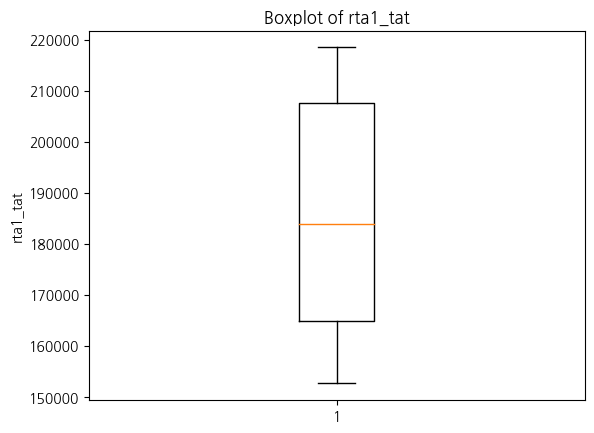

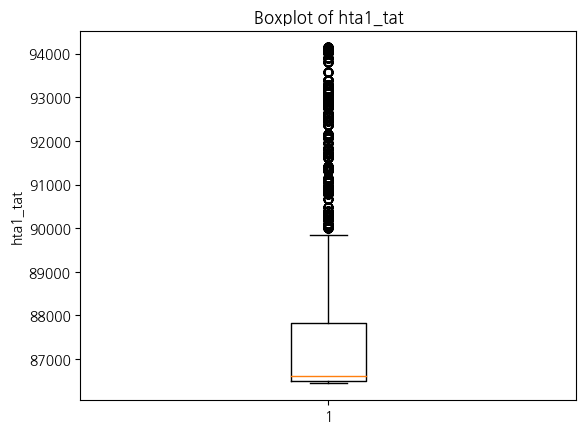

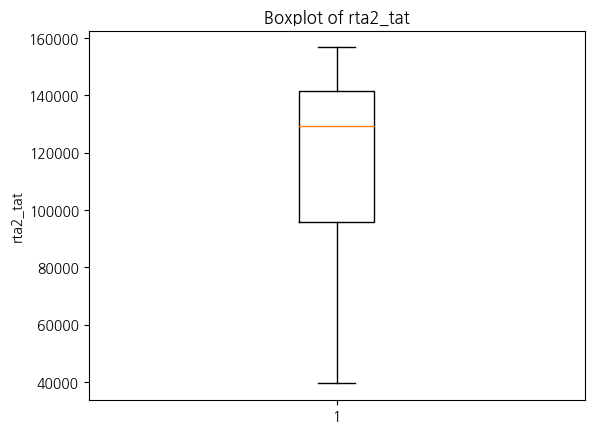

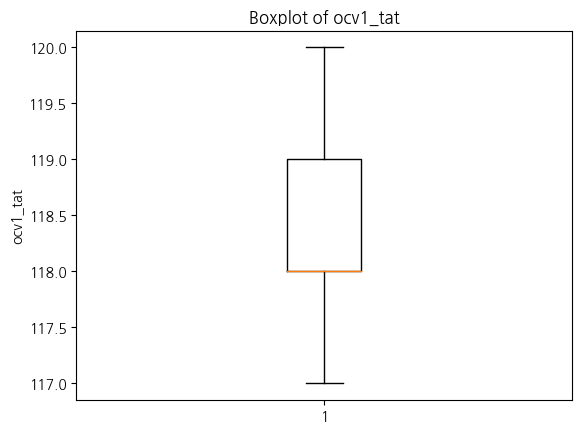

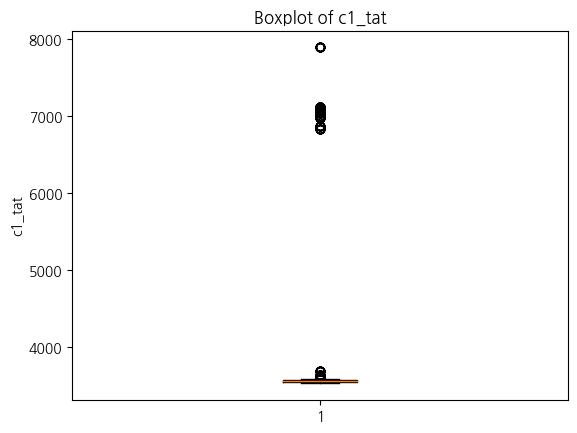

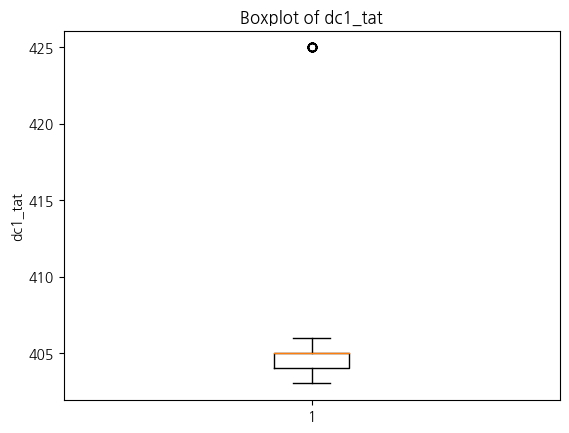

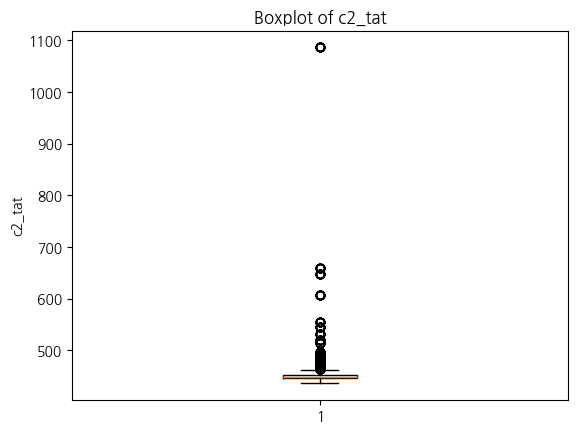

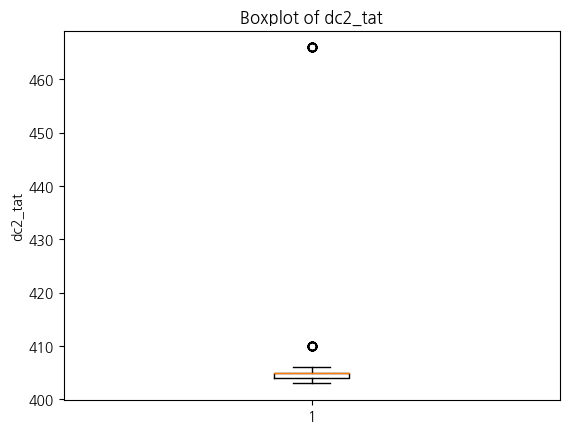

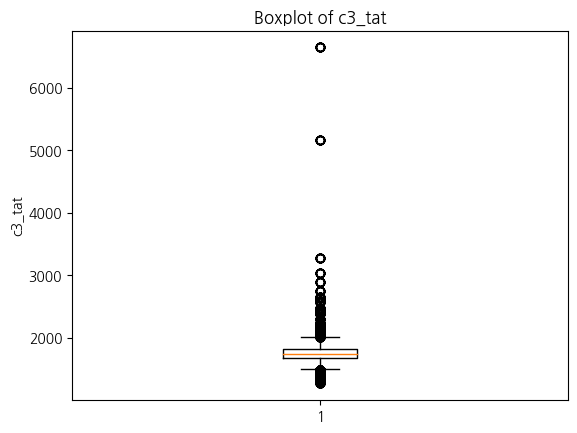

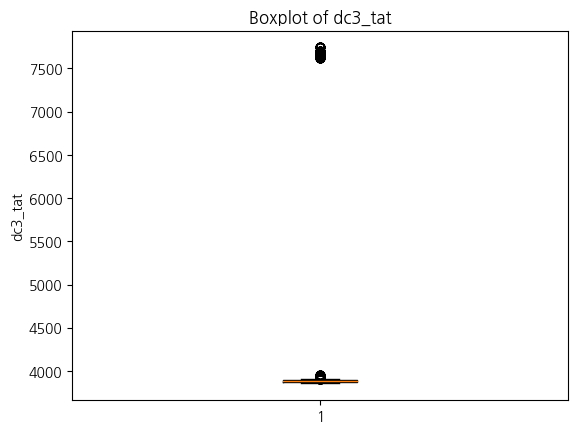

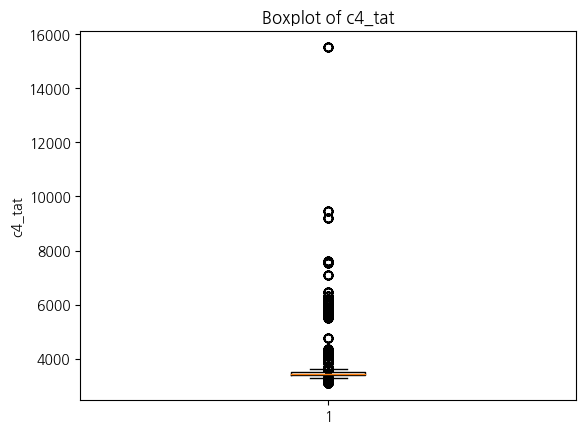

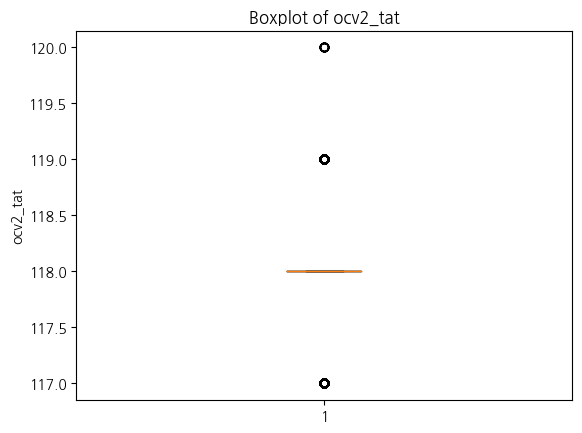

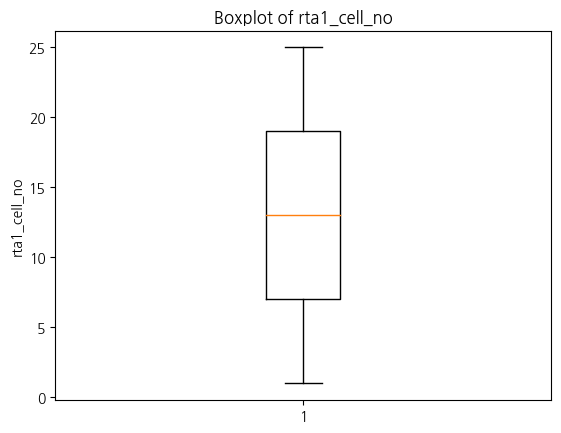

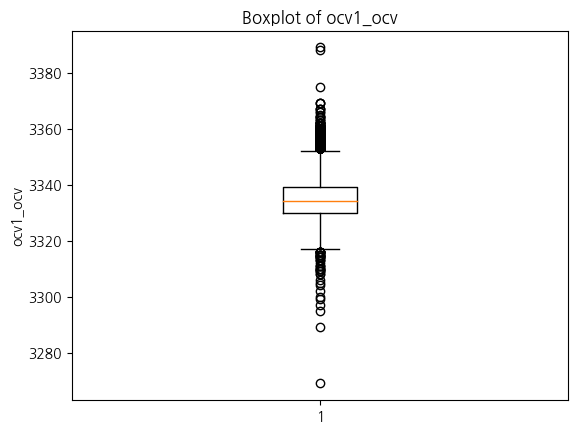

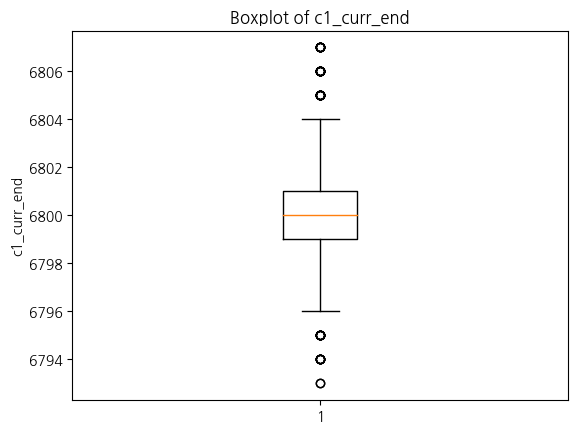

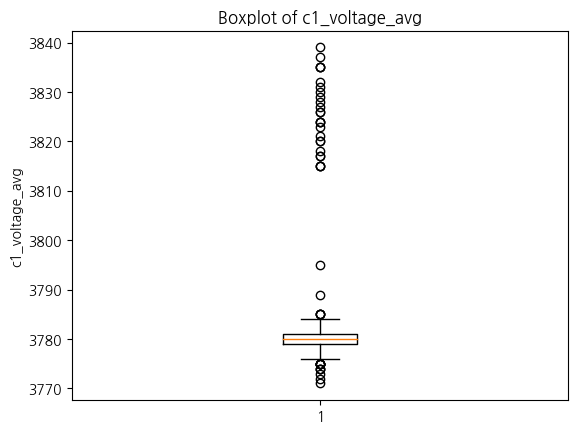

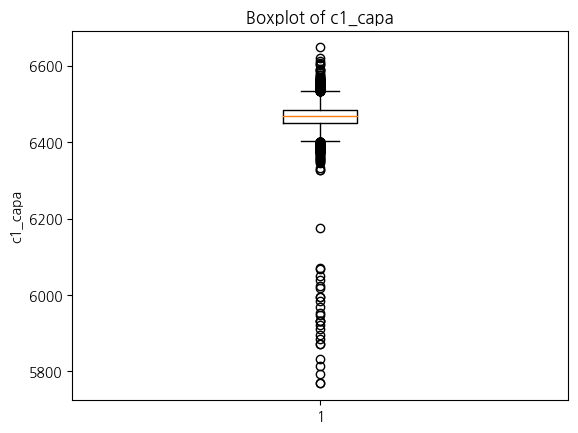

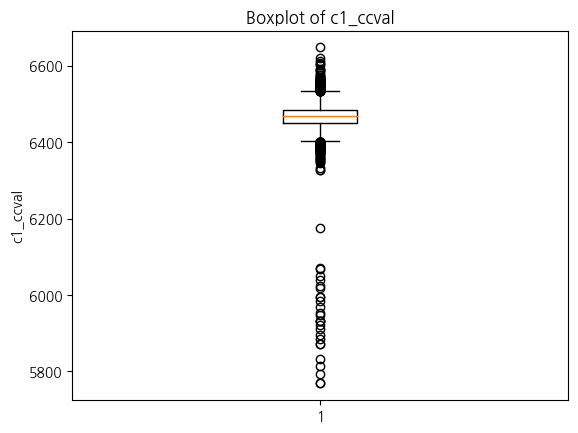

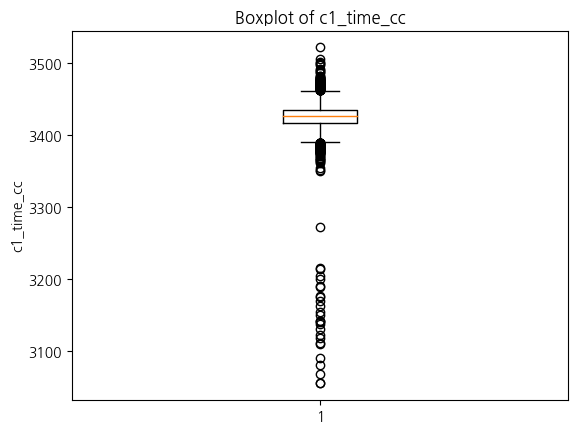

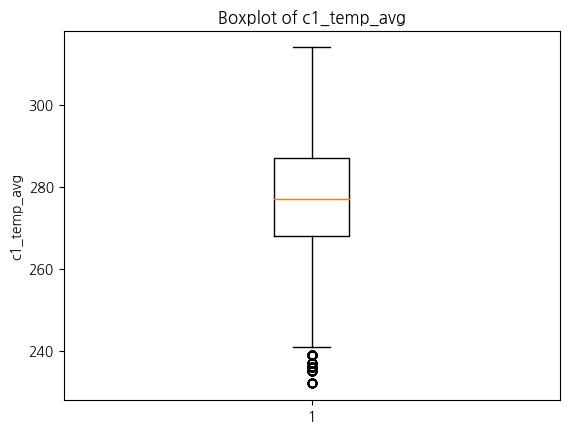

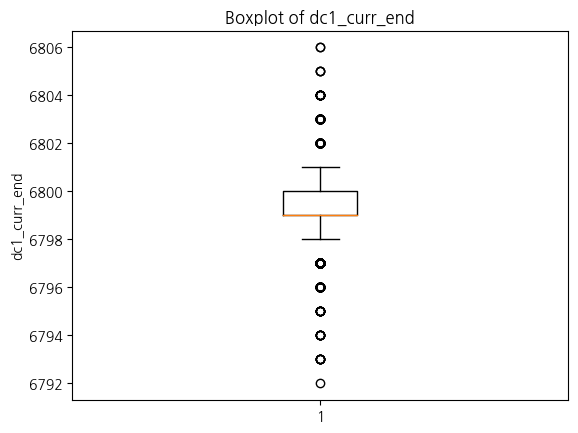

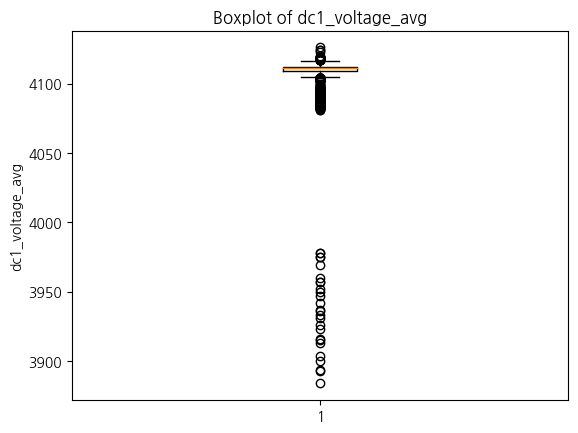

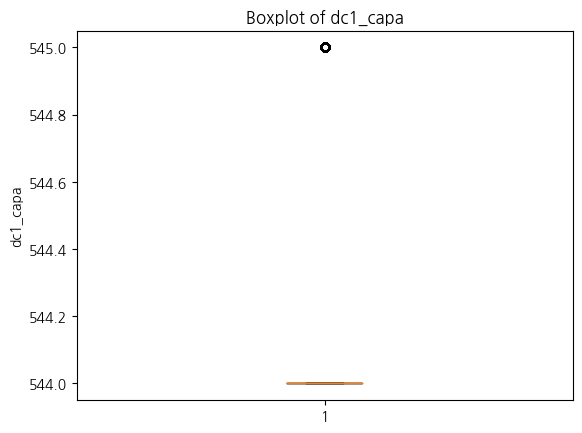

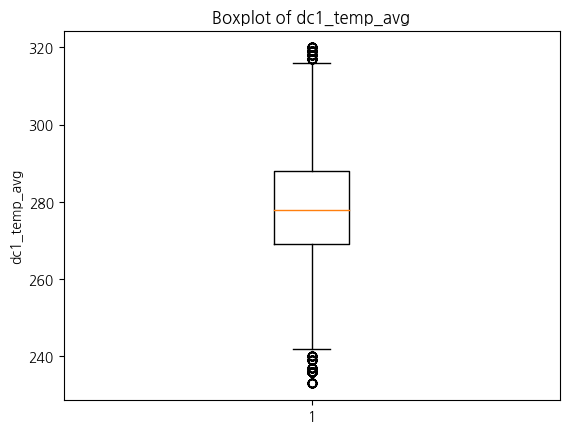

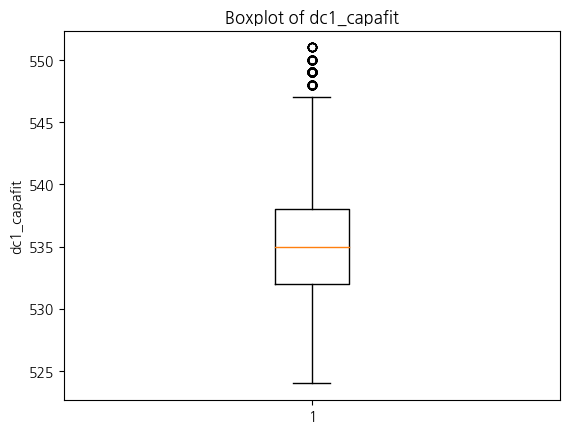

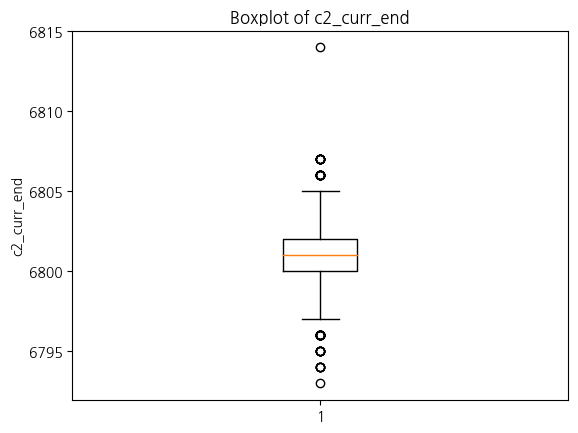

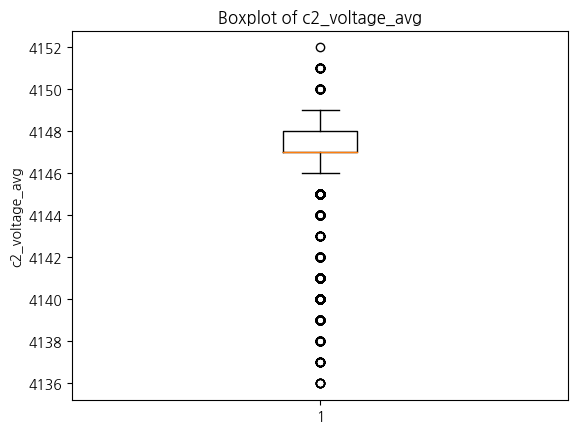

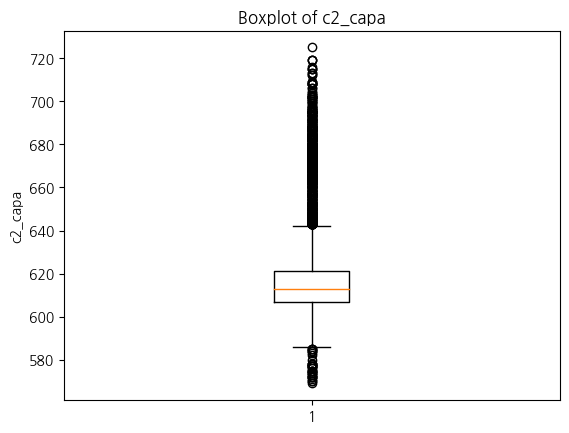

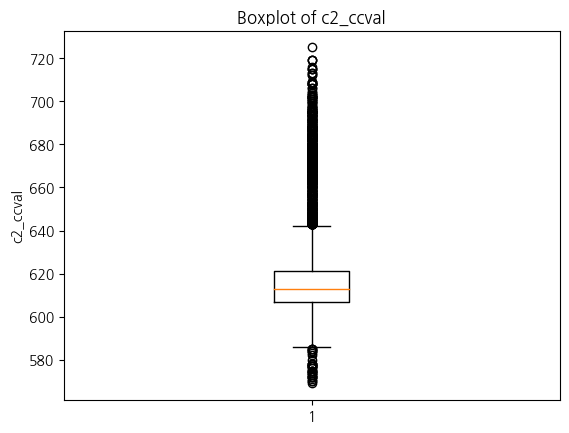

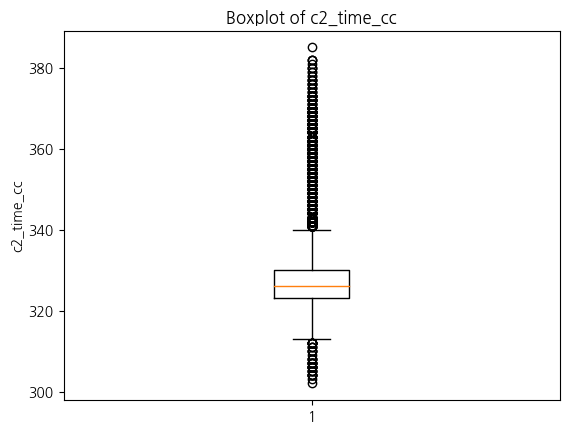

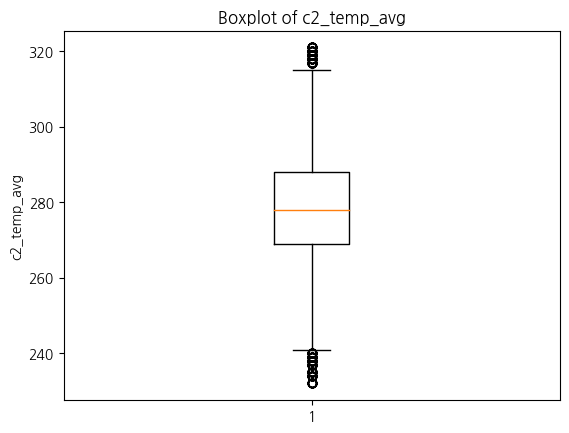

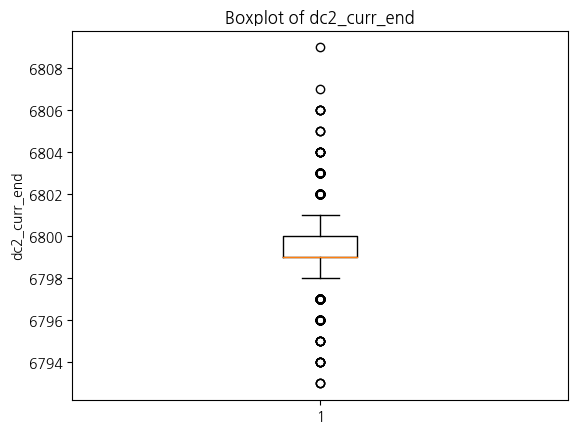

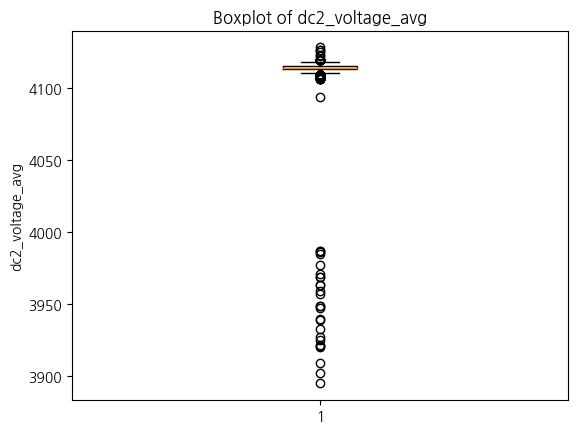

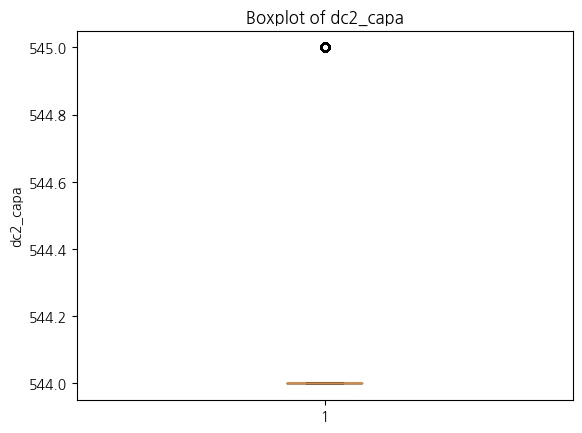

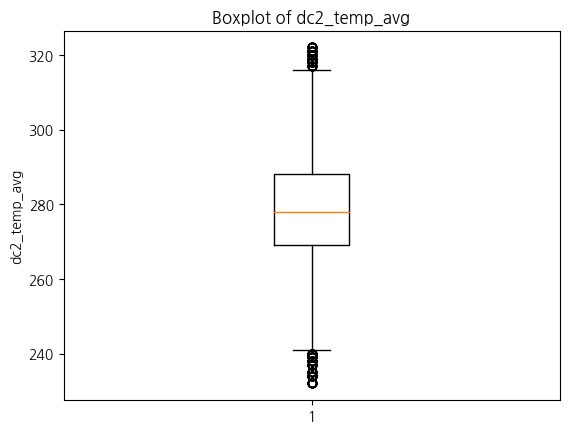

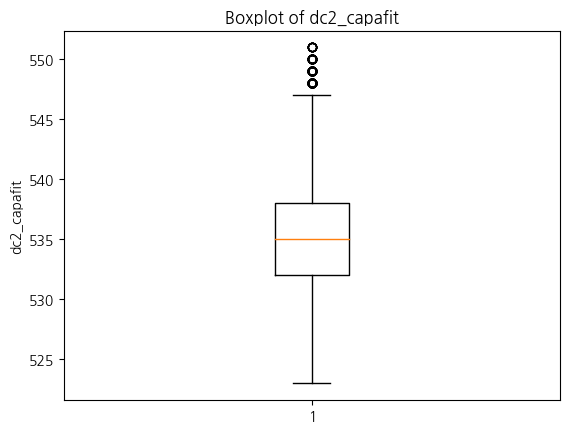

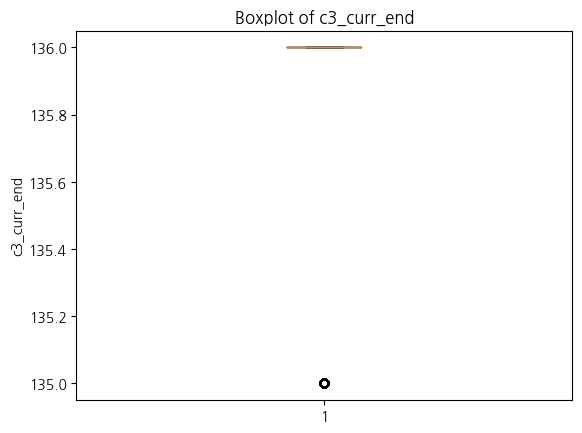

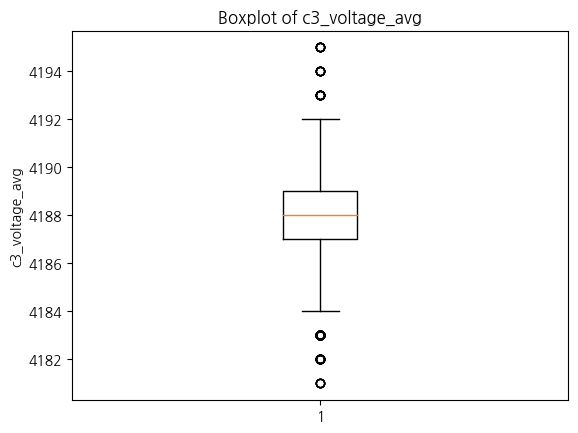

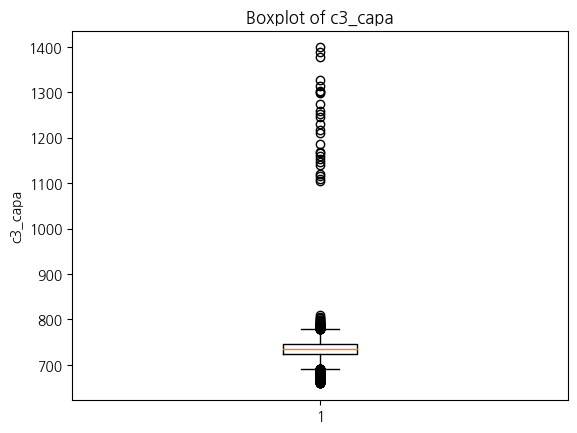

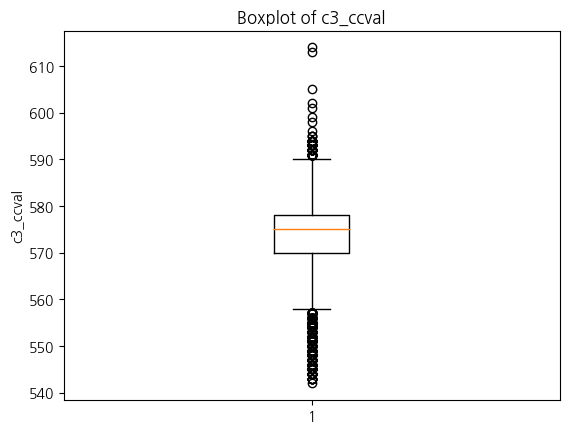

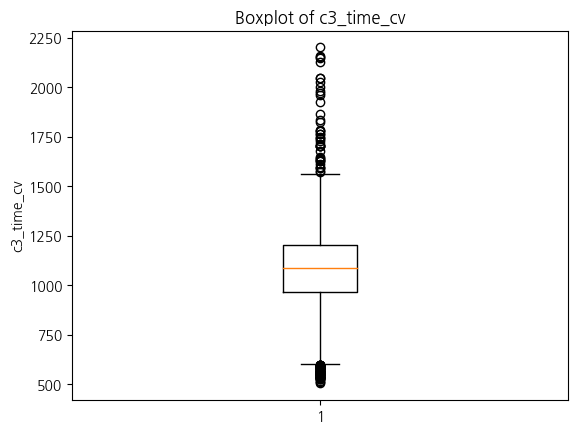

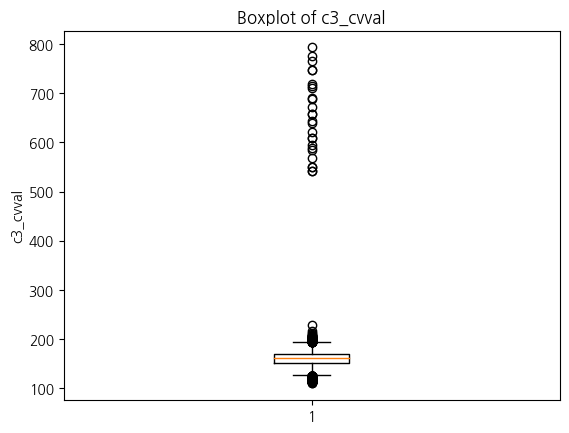

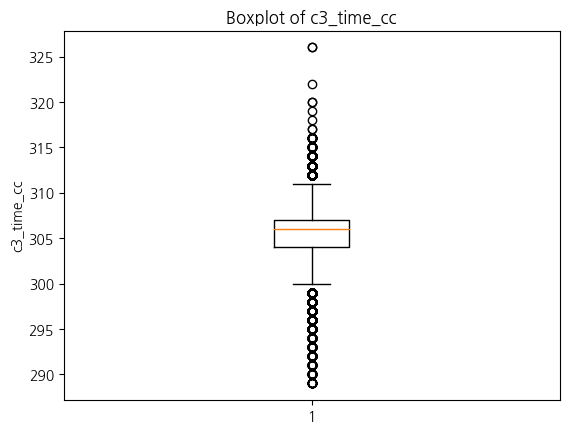

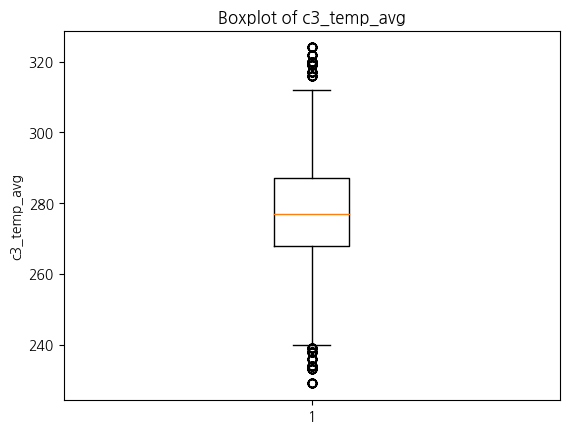

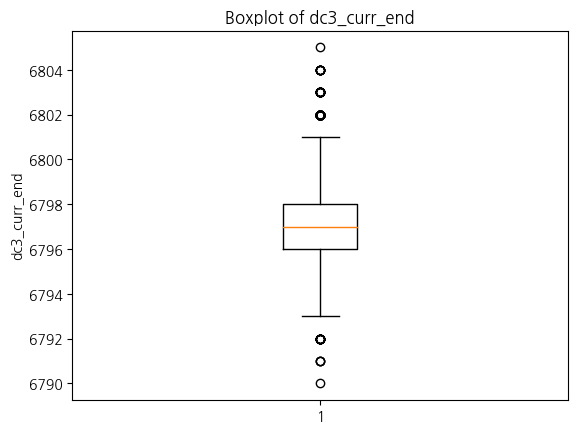

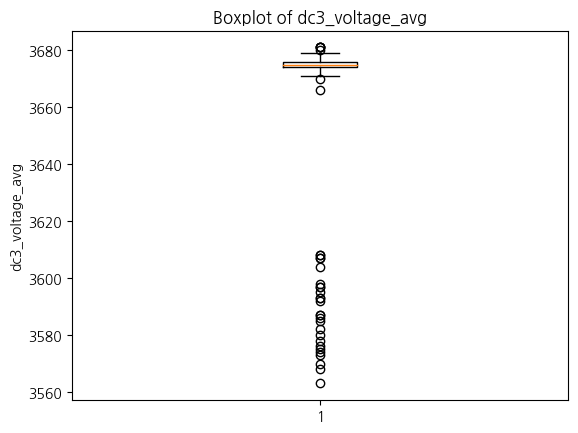

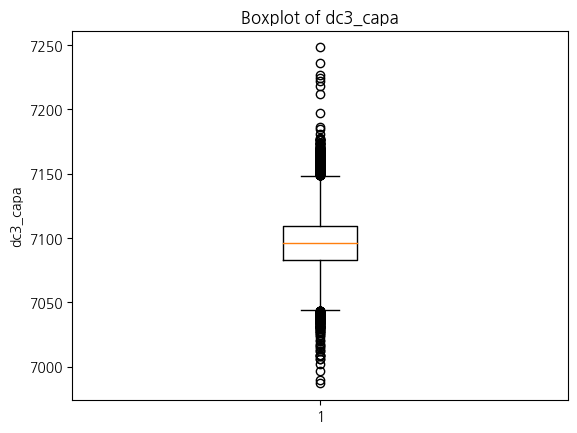

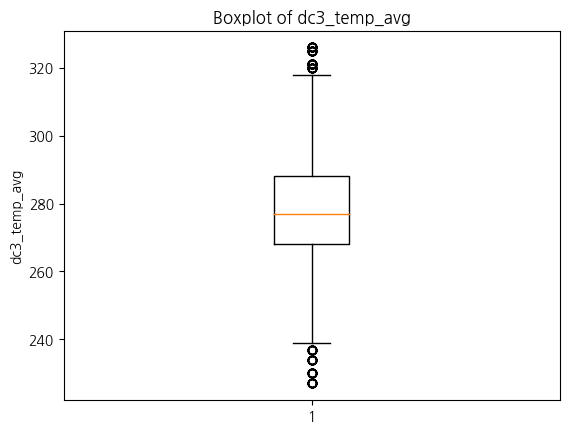

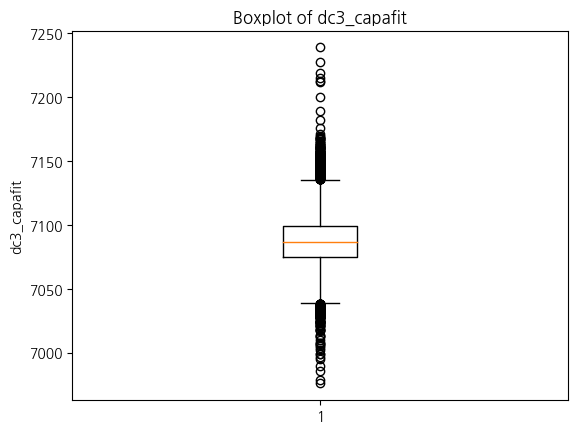

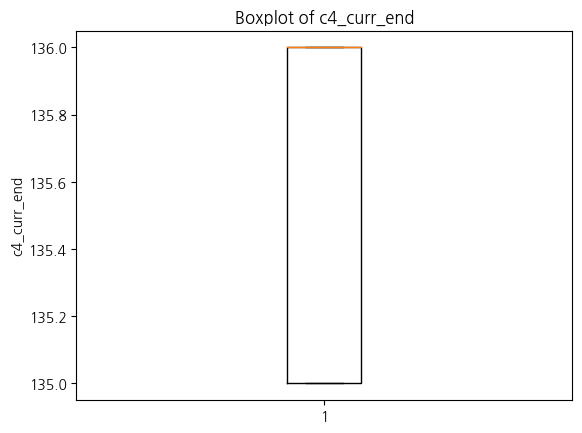

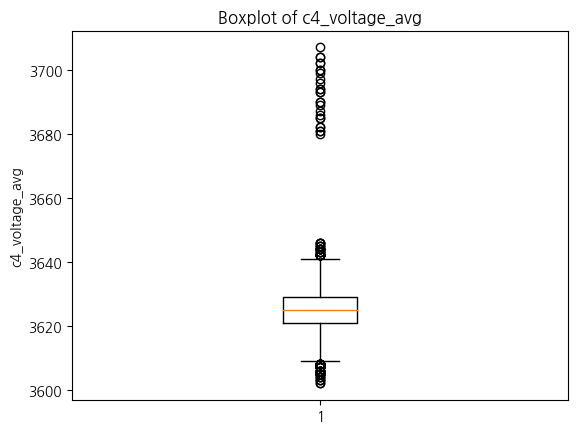

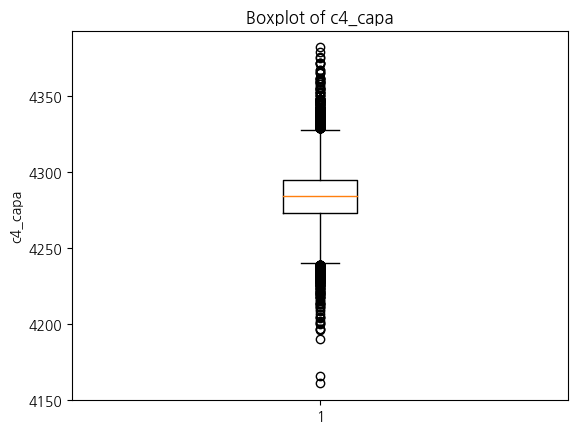

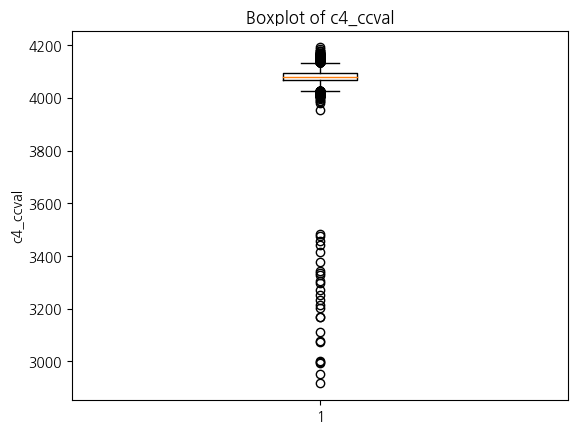

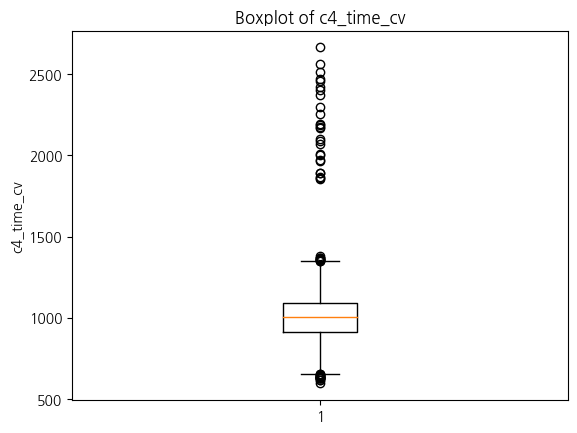

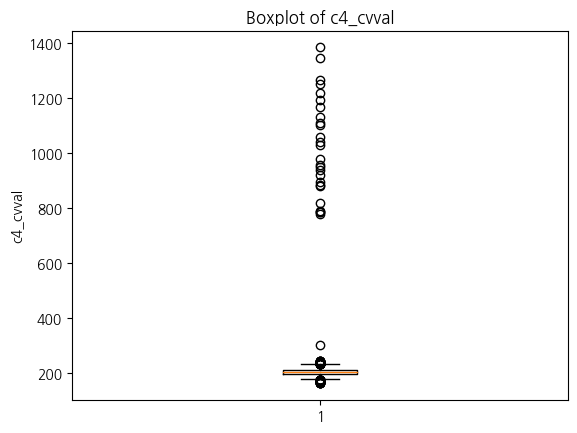

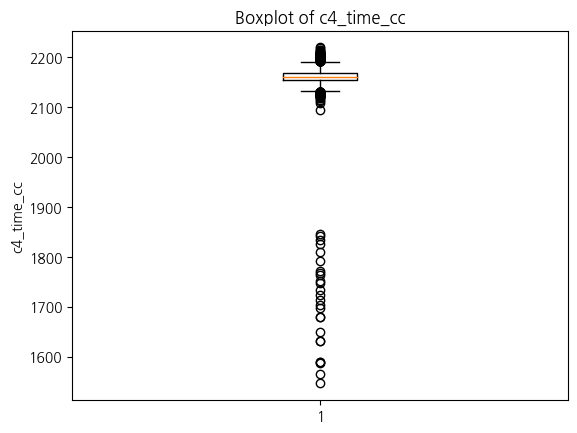

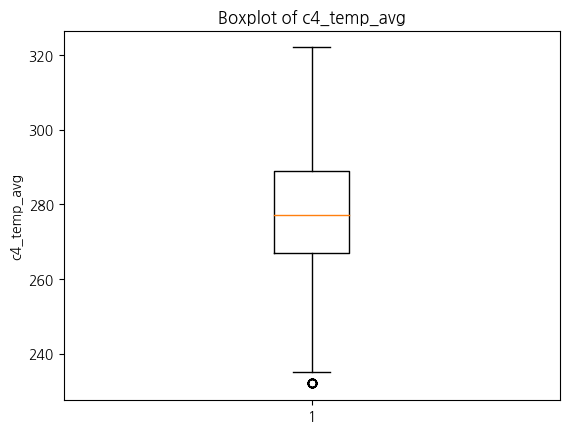

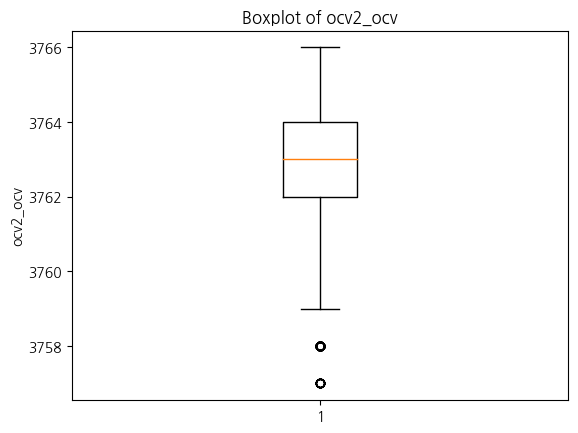

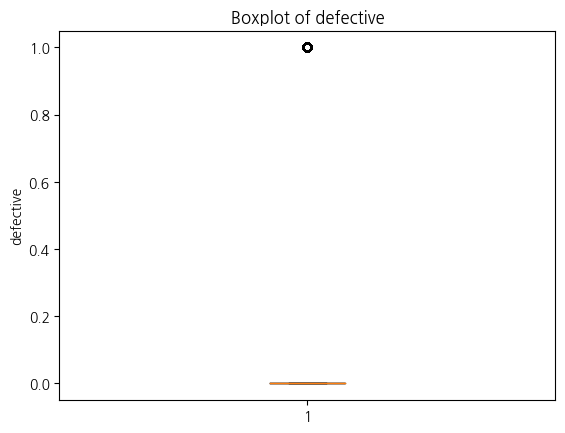

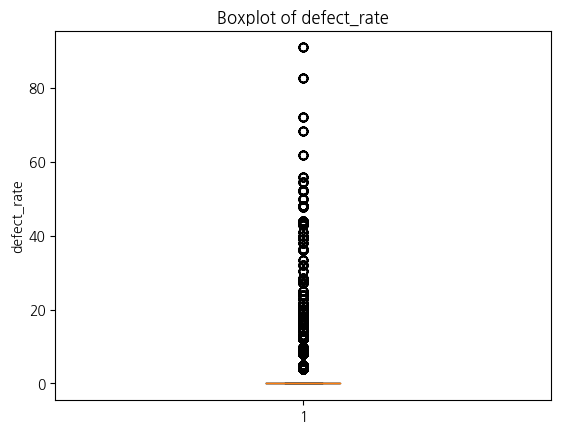

In [32]:
for column in df_all.select_dtypes(include=['float64', 'int64']).columns:
    plt.boxplot(df_all[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

In [22]:
df_all['defective'].value_counts()

0    28796
1     1016
Name: defective, dtype: int64

In [34]:
df_all['defect_rate'].value_counts().sort_index(ascending=True)

0.000000     22485
4.000000      2050
4.166667       408
4.347826       506
4.545455        88
4.761905       462
5.000000       140
8.000000       750
8.333333        72
8.695652        92
9.090909        22
9.523810       105
10.000000       60
12.000000      350
12.500000       48
13.043478       23
14.285714      126
15.000000       20
16.000000      150
16.666667       72
17.391304       46
18.181818       44
19.047619       21
20.000000      195
20.833333       24
21.739130       46
22.727273       22
24.000000      125
25.000000       44
27.272727       66
28.000000       75
28.571429       21
30.434783       23
32.000000       50
33.333333       21
36.000000      100
36.363636       44
38.095238       21
39.130435       23
40.000000       25
40.909091       22
42.857143       42
43.478261       46
44.000000      100
47.619048       42
48.000000      200
50.000000       44
52.000000       25
52.173913       23
52.380952       21
54.545455       44
56.000000       25
61.904762   

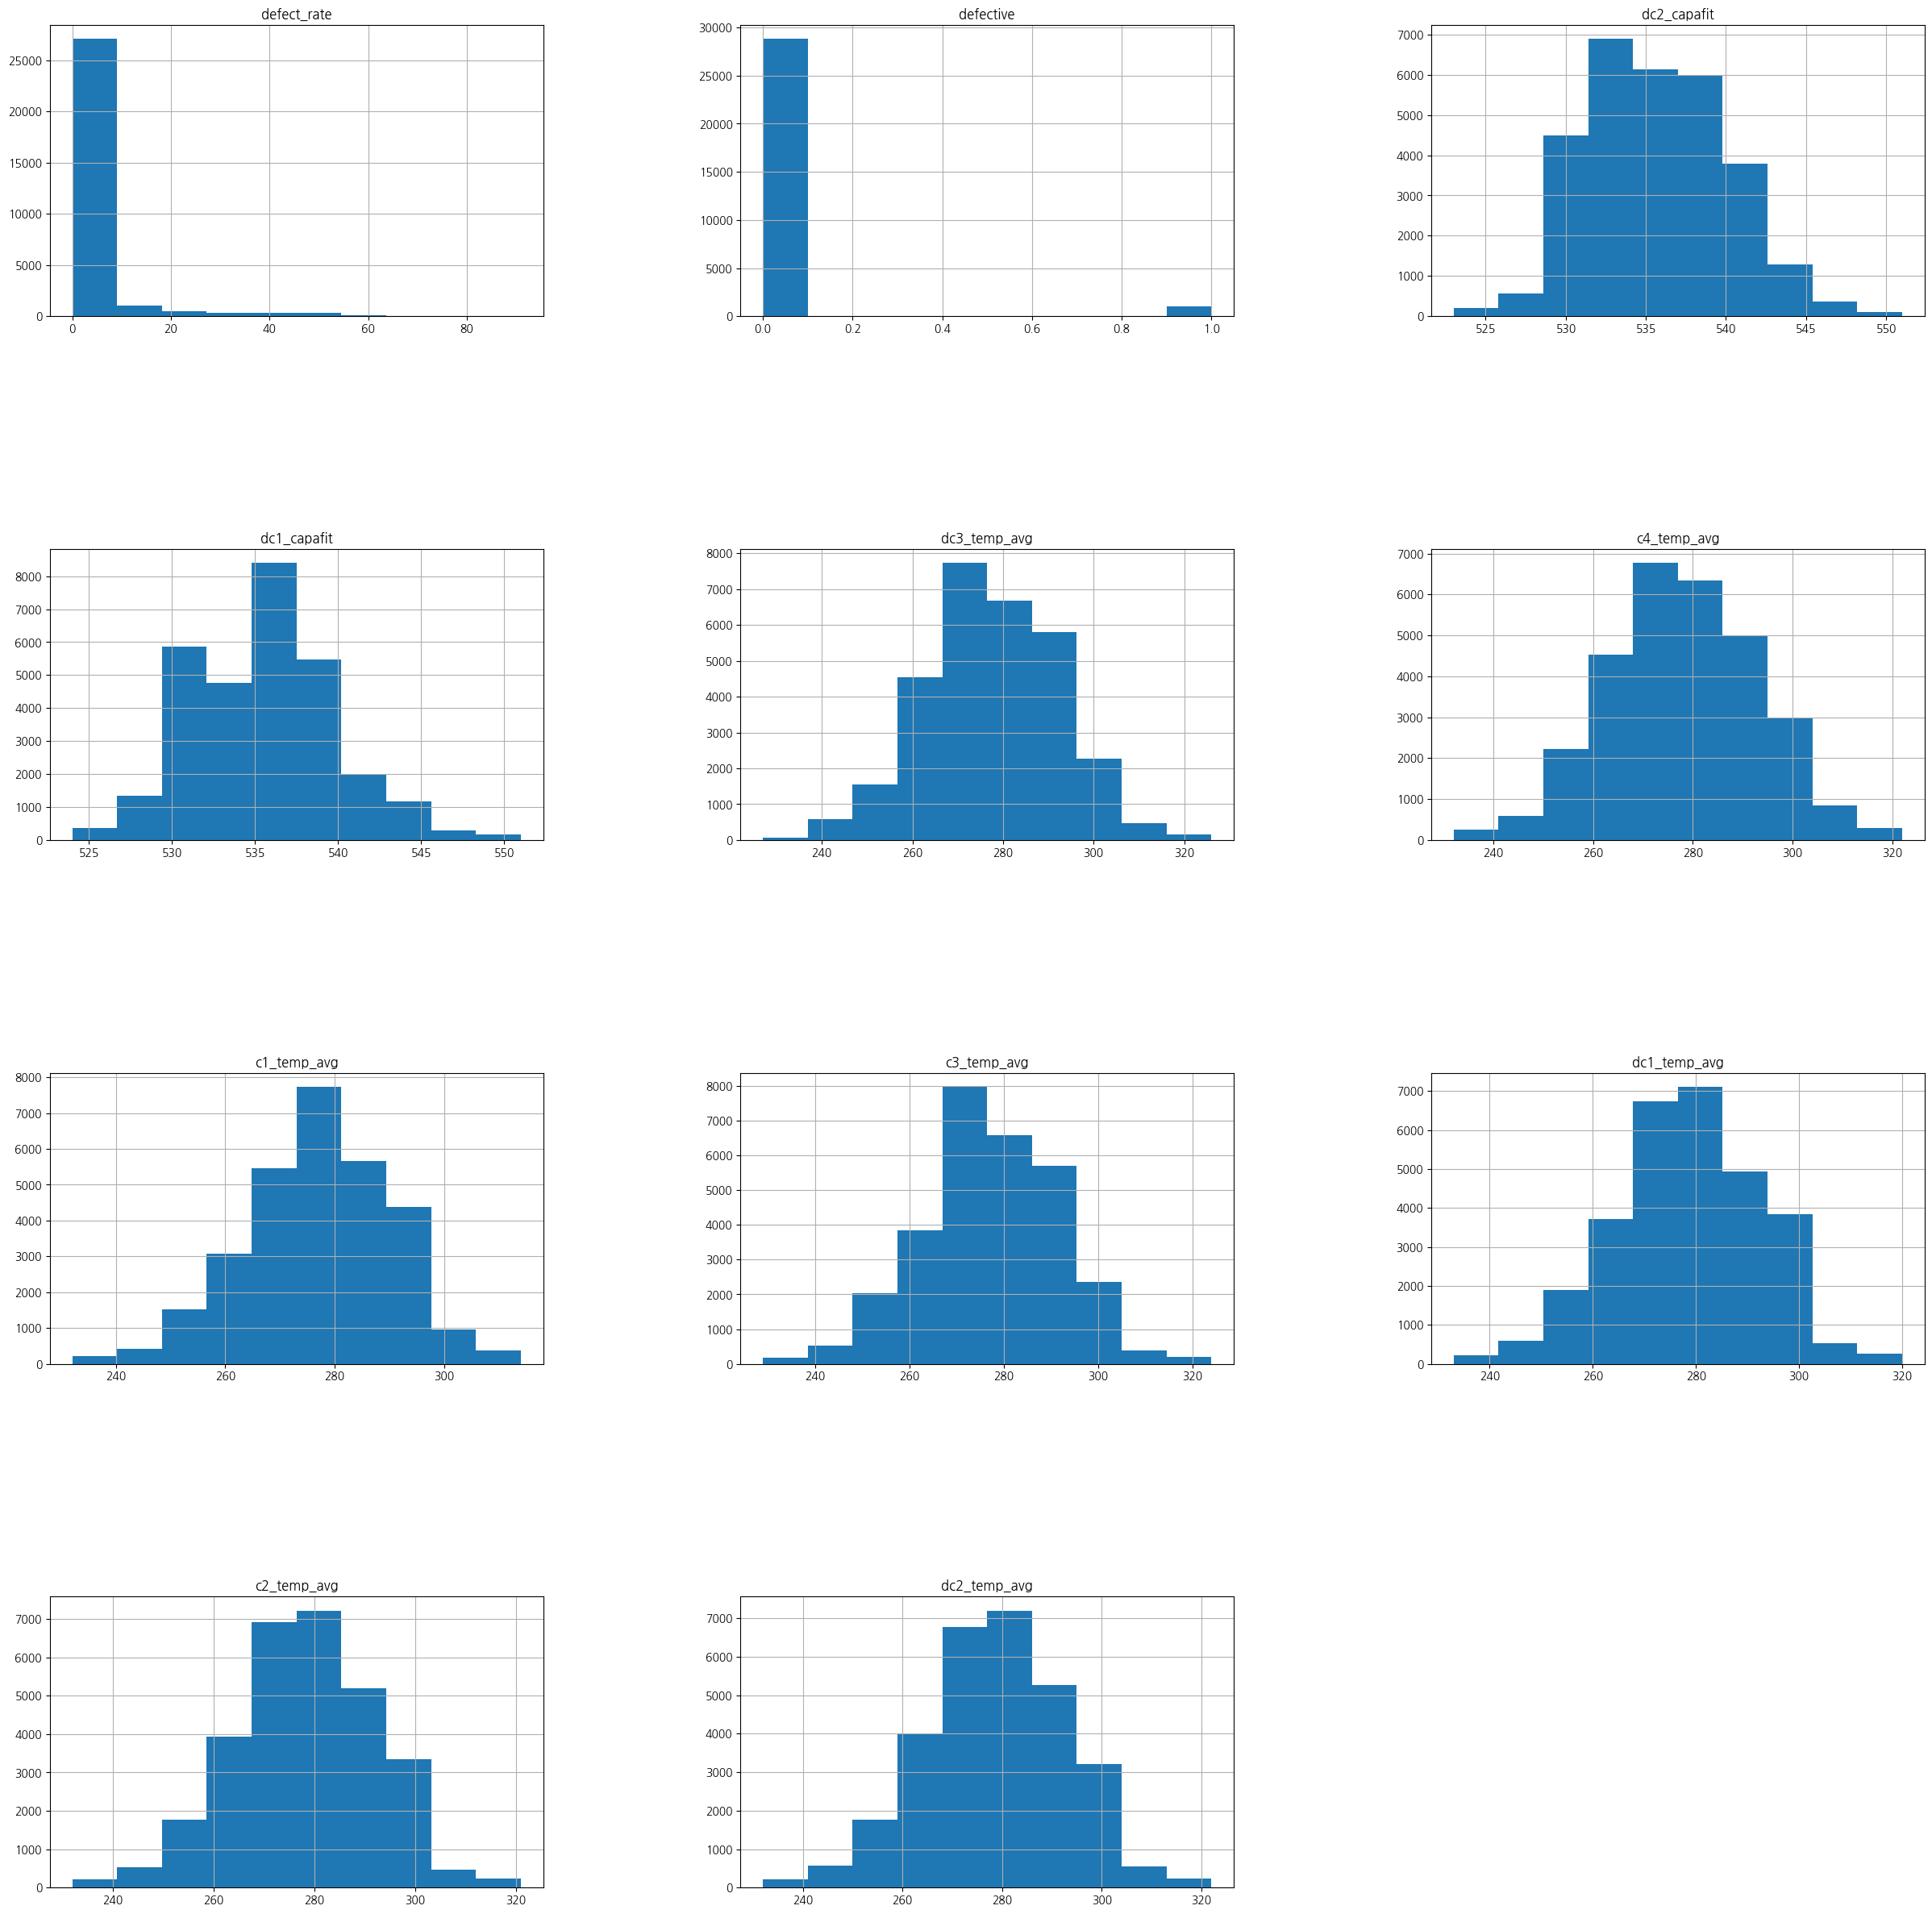

In [35]:
filtered_df_all.hist(figsize = (30, 30)) #히스토그램 - 데이터의 전반적인 분포를 파악
plt.subplots_adjust(wspace=0.4, hspace=0.8)

# 카이제곱(범주-목표_defect_rate)

In [37]:
import pandas as pd
from scipy.stats import chi2_contingency

# 각 범주형 변수에 대해 카이제곱 검정 수행
for column in filtered_df_all.select_dtypes(include=['object']).columns:
    contingency_table = pd.crosstab(filtered_df_all[column], filtered_df_all['defect_rate'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {column}:')
    print('Chi-square statistic:', chi2)
    print('p-value:', p_value)
    print()

# ANOVA 범주형 VS 연속형

In [38]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# 각 범주형 변수에 대해 ANOVA 검정 수행
for column in filtered_df_all.select_dtypes(include=['object']).columns:
    groups = [filtered_df_all[filtered_df_all[column] == category]['defect_rate'] for category in filtered_df_all[column].unique()]
        
    # 그룹의 길이가 1보다 큰 그룹만 포함
    groups = [group for group in groups if len(group) > 1]
        
    if len(groups) > 1:  # 두 개 이상의 그룹이 있을 때만 ANOVA 수행
        f_statistic, p_value = stats.f_oneway(*groups)
        print(f'ANOVA test for {column}:')
        print('F-statistic:', f_statistic)
        print('p-value:', p_value)
        print()
    else:
        print(f'ANOVA test for {column}: Not enough data for ANOVA.')


0.05 기준
유의미한 결과 : 0.05 이하 0만 있음

나머지 유의미하지 않은 결과 리스트
lot_id 1.16
rta1_box_col 6.4
rta1_box_dan 5.0
hta1_box_col 1.06
hta1_box_dan 9.7
rta2_box_col 3.17
tra2_box_dan 3.3
ocv1_box_dan 2.6
c1_box_dan 2.6
dc1_box_dan 2.6
c2_box_dan 2.6
dc2_box_dan 2.6
c3_box_dan 2.6
dc3_box_dan 2.6
c4_box_dan 2.6
ocv2_box_dan 2.6

# defective_rate 히스토그램

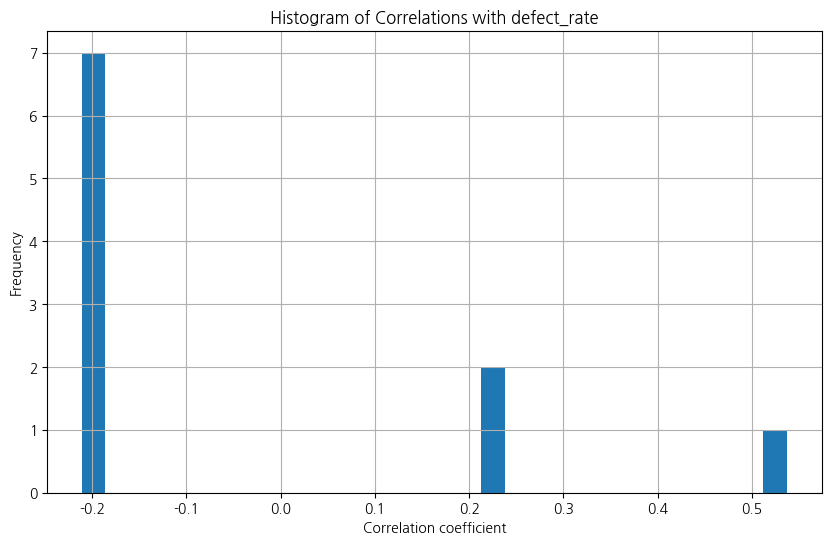

In [39]:
import matplotlib.pyplot as plt

# 모든 수치형 열에 대해 defect_rate와의 상관관계 계산
correlations = filtered_df_all.corr()['defect_rate'].drop('defect_rate')

# 상관관계 히스토그램 시각화
plt.figure(figsize=(10, 6))
correlations.hist(bins=30)
plt.title('Histogram of Correlations with defect_rate')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.show()

# defact_rate scatter

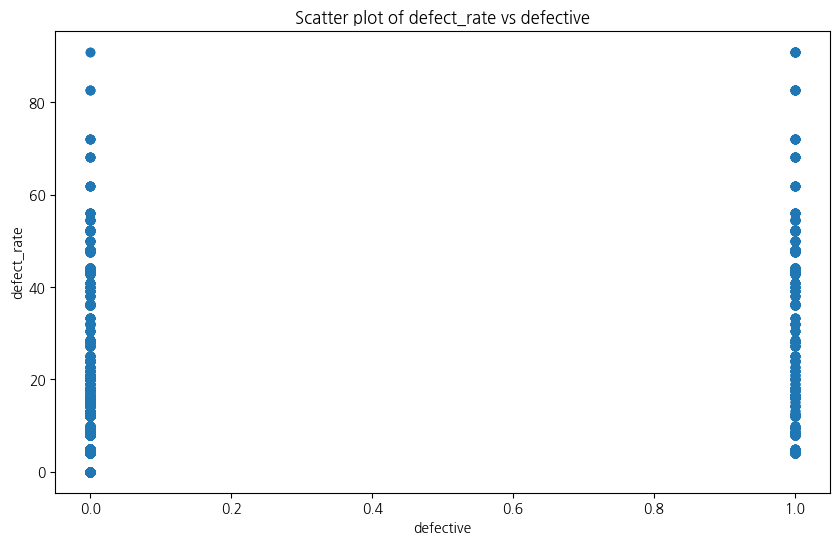

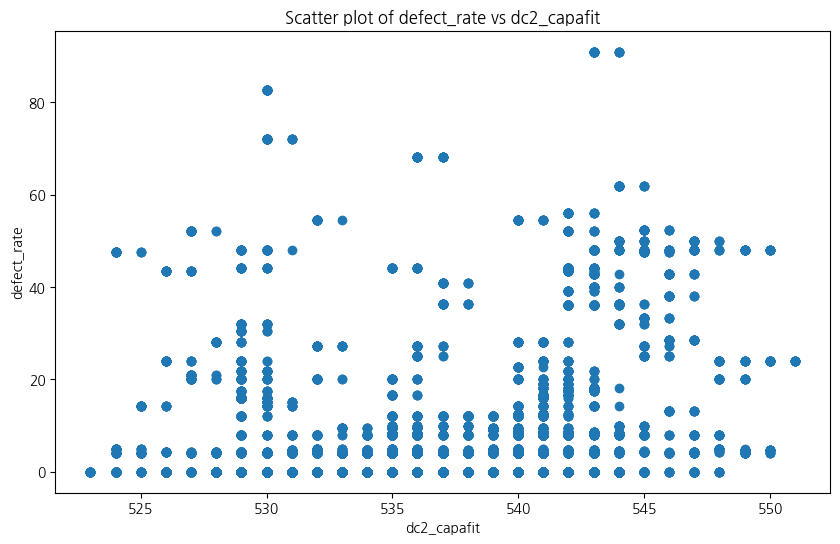

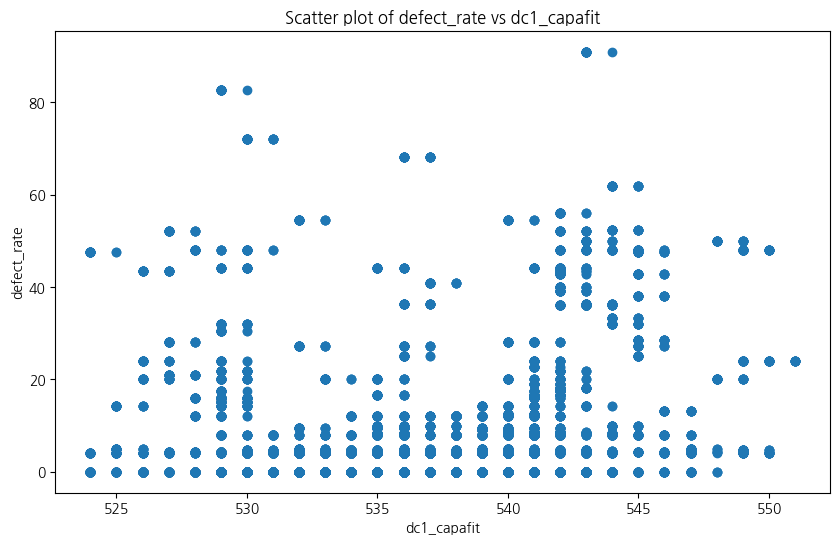

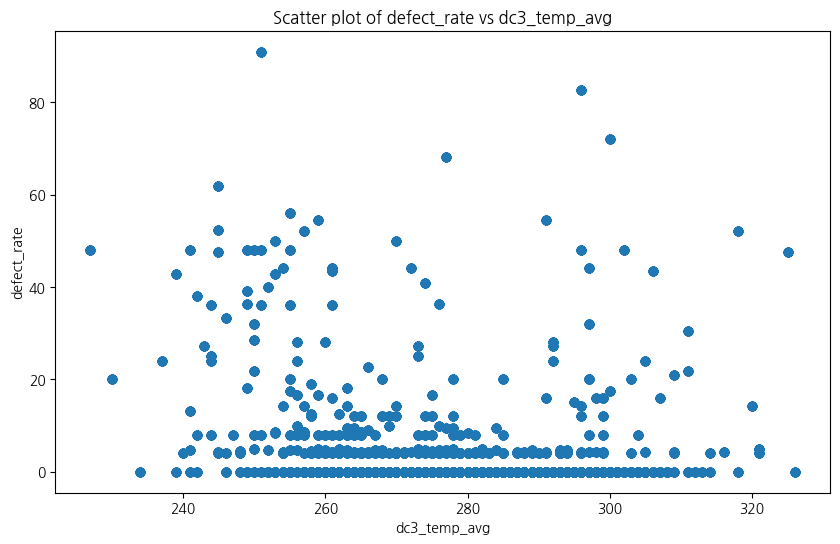

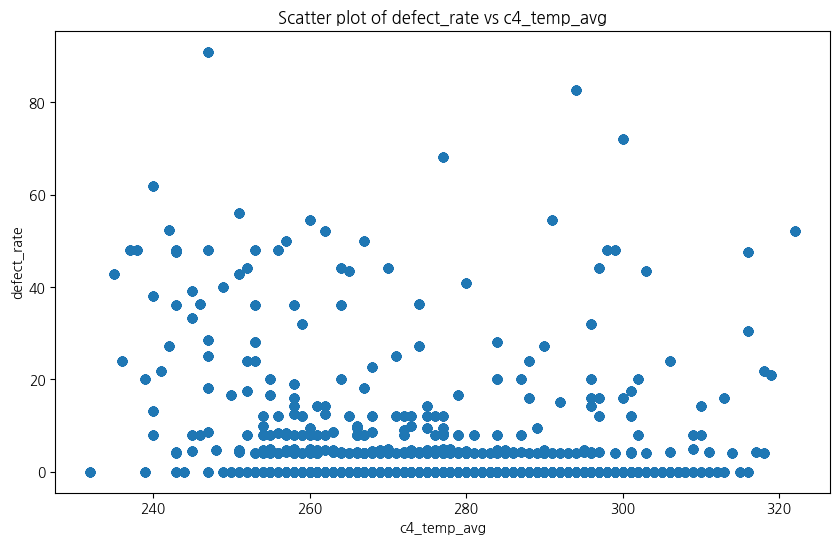

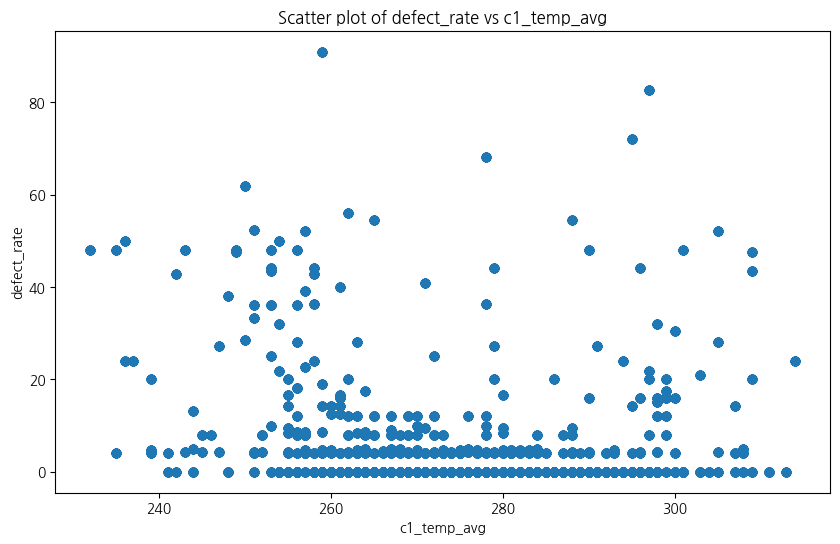

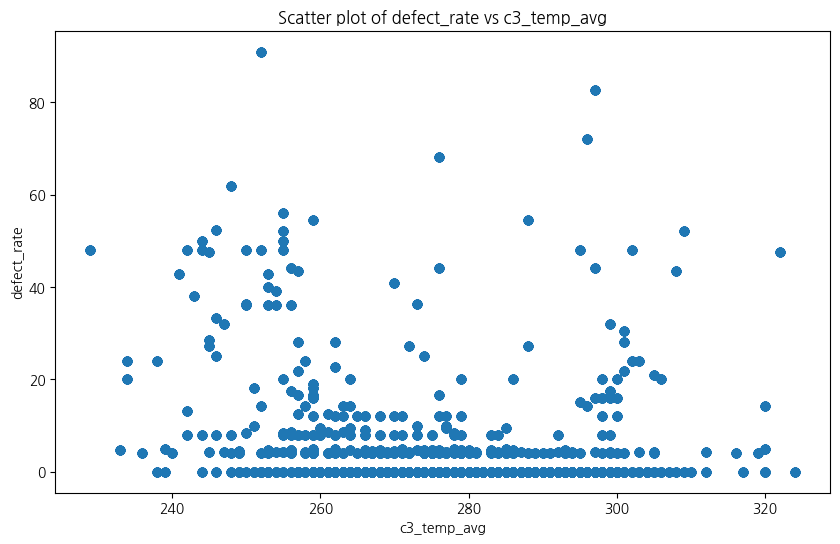

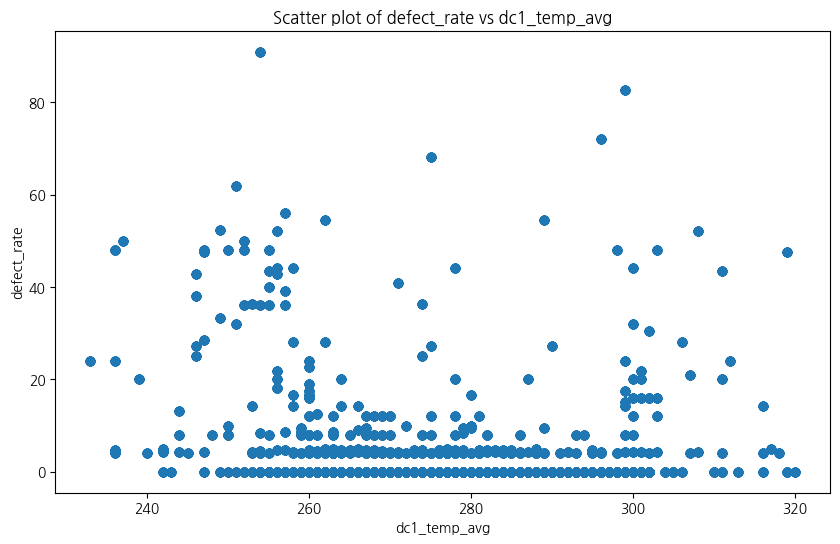

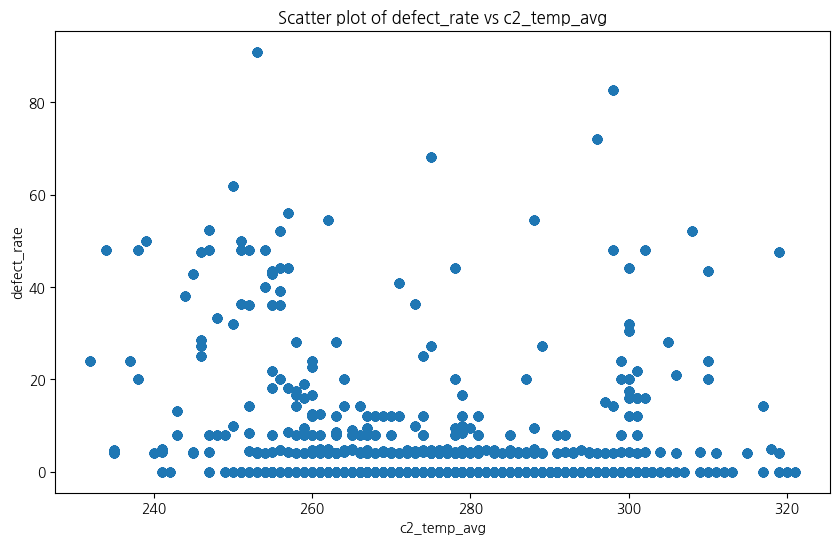

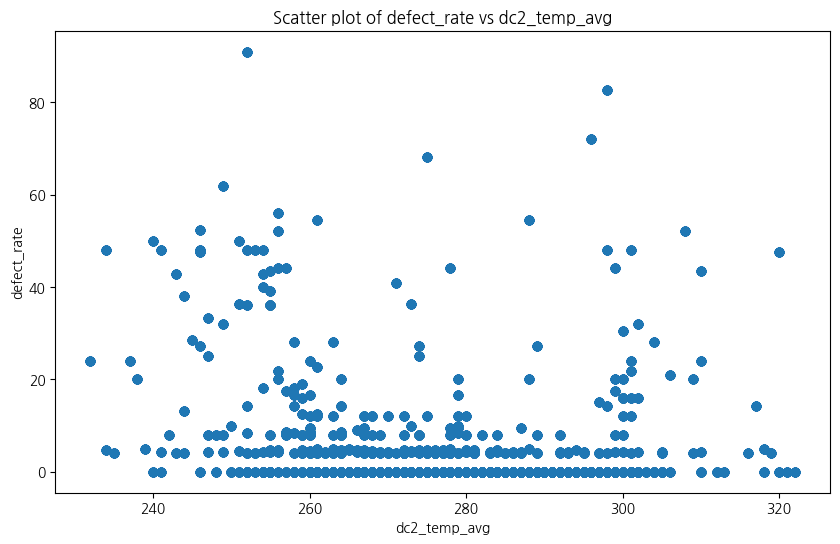

In [40]:
import matplotlib.pyplot as plt

# 모든 열 이름을 리스트로 저장 (defect_rate 제외)
columns_to_plot = [column for column in filtered_df_all.columns if column != 'defect_rate']

# 모든 열에 대해 defect_rate와의 산점도 시각화
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df_all[column], filtered_df_all['defect_rate'])
    plt.title(f'Scatter plot of defect_rate vs {column}')
    plt.xlabel(column)
    plt.ylabel('defect_rate')
    plt.show()

# 연속형 설명 변수와 목표 변수 관계

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 열 이름을 리스트로 저장 (defect_rate 제외)
columns_to_plot = [column for column in df_all.columns if column != 'defect_rate']

# 모든 열에 대해 defect_rate와의 박스플롯 시각화
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='defect_rate', data=df_all)
    plt.title(f'Box plot of defect_rate vs {column}')
    plt.xlabel(column)
    plt.ylabel('defect_rate')
    plt.show()

ValueError: Could not interpret input 'lot_id'

<Figure size 1000x600 with 0 Axes>

# pairplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 페어플롯 시각화
sns.pairplot(df_all, vars=df_all.columns, hue='judge', palette='coolwarm')
plt.suptitle('Pairplot of Variables with defect_rate', y=1.02)
plt.show()

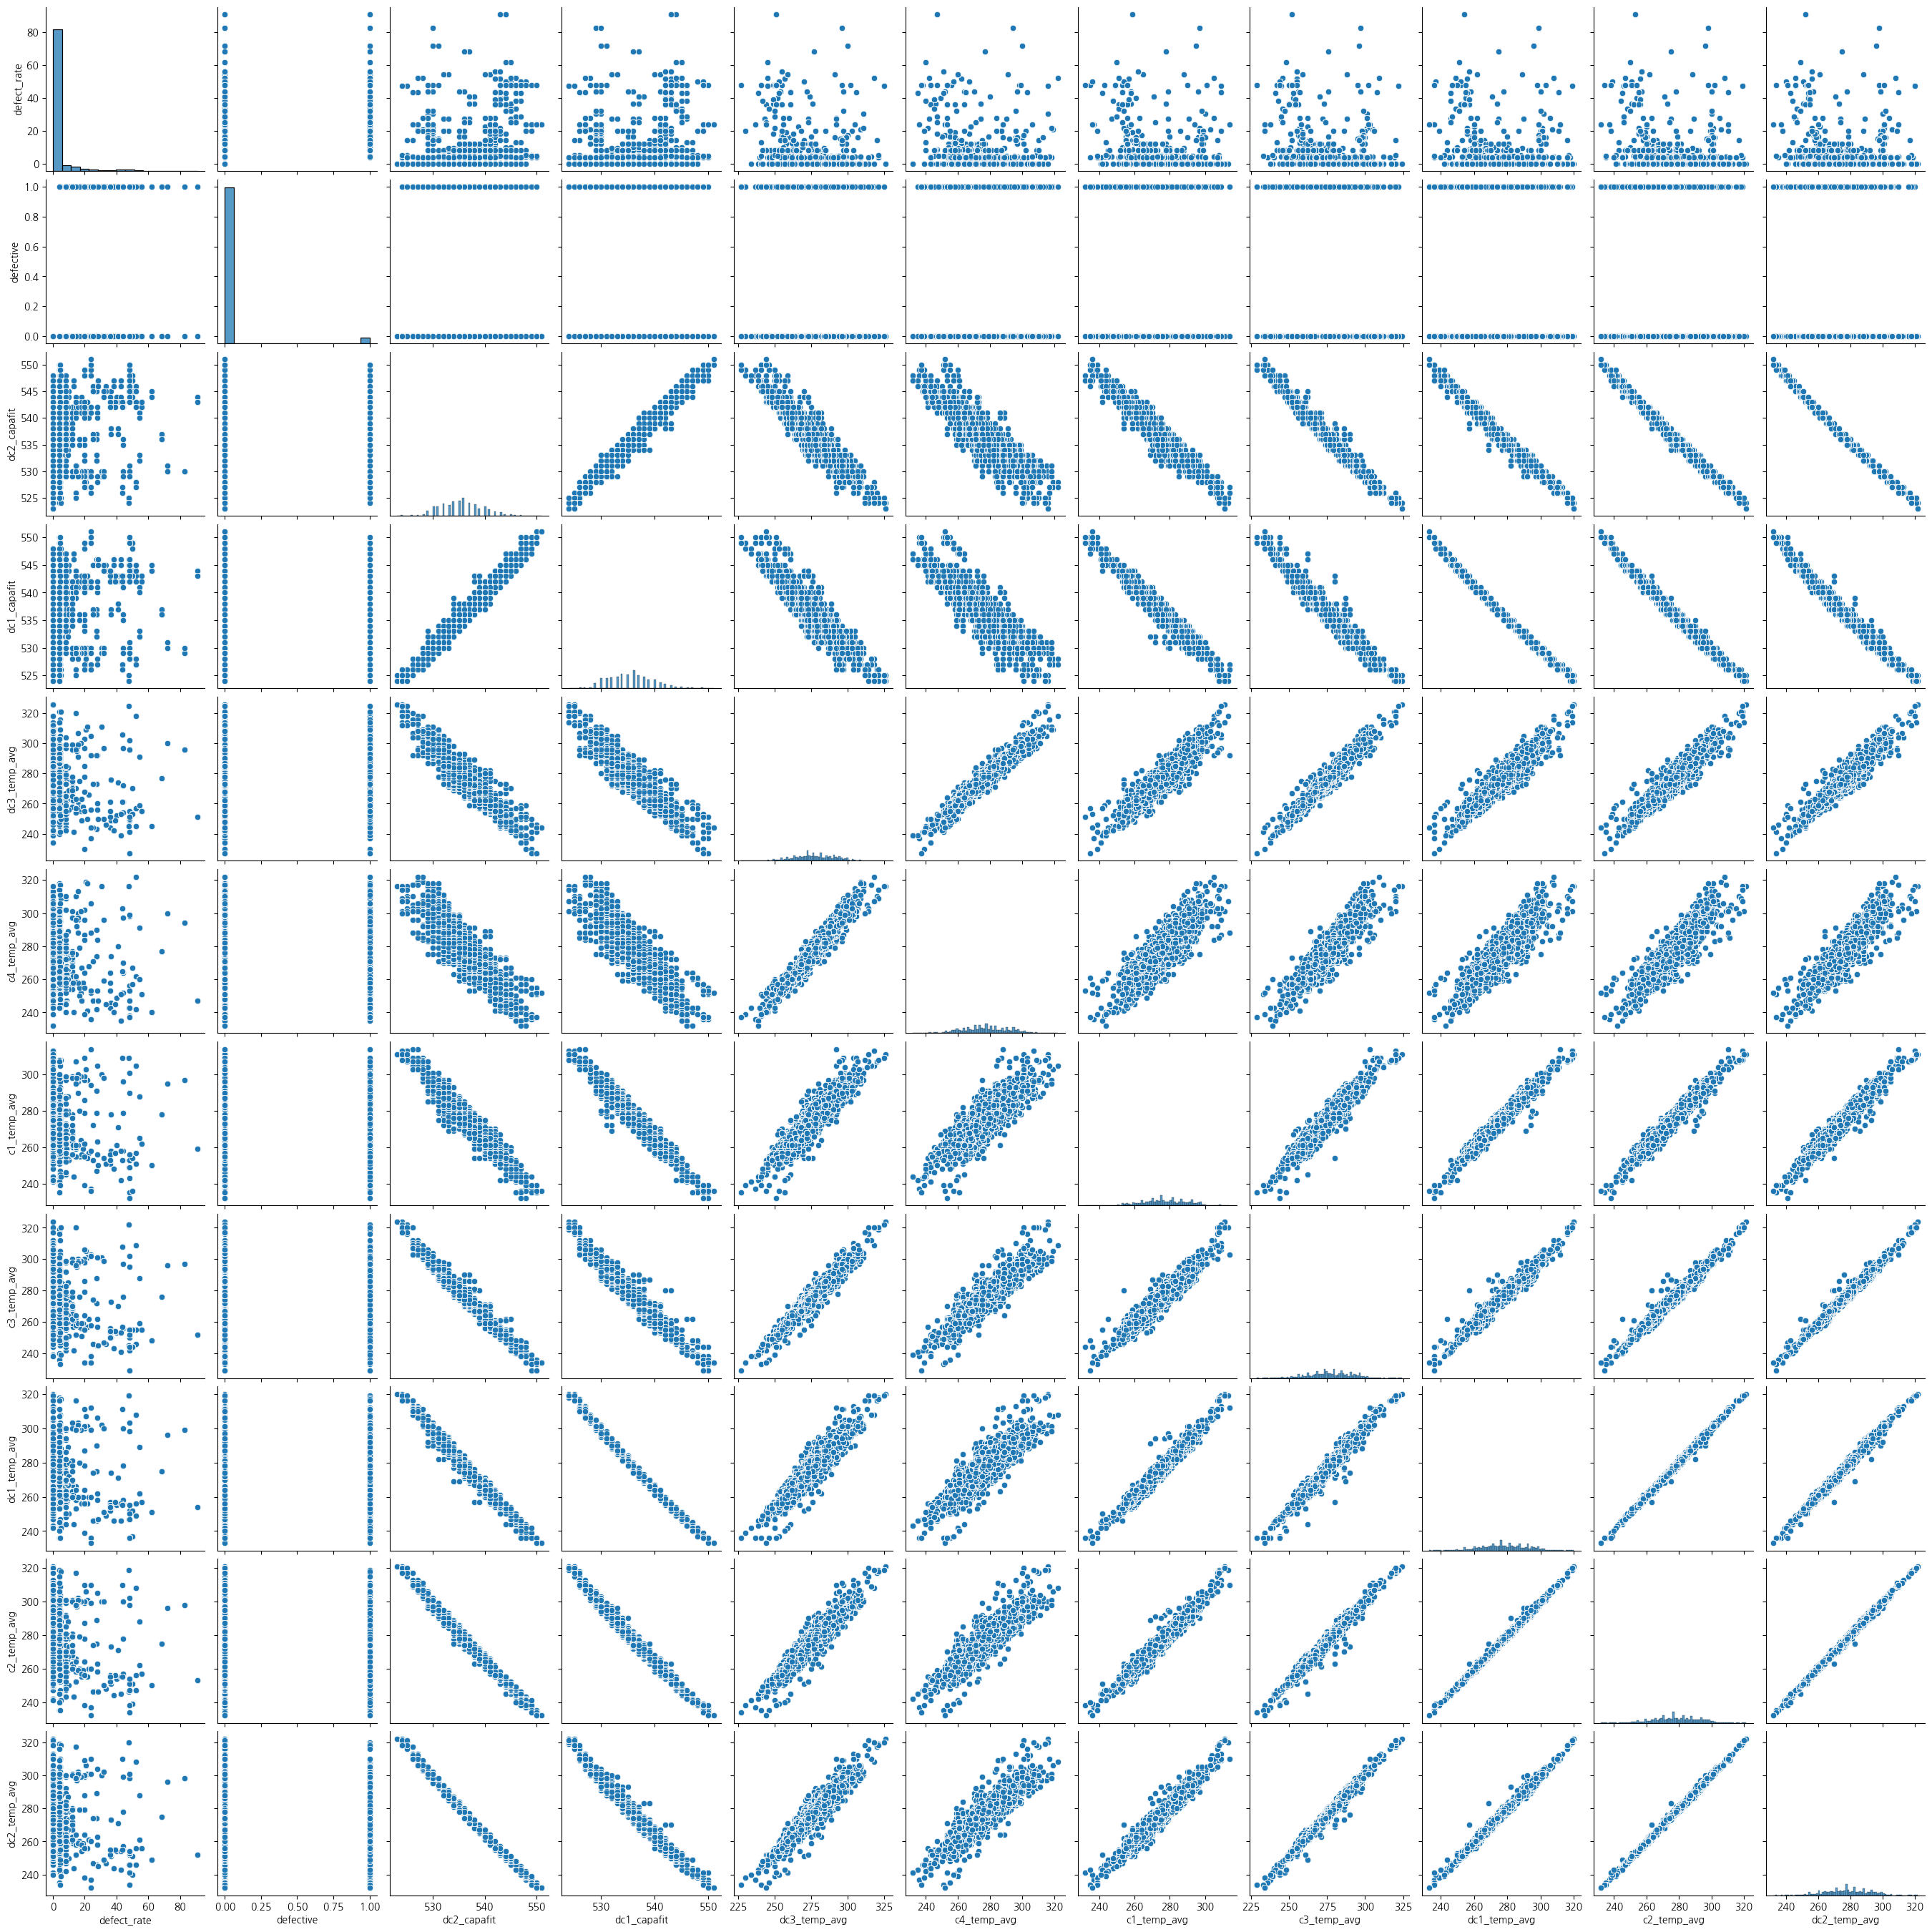

In [42]:
# 'judge' 기준으로 데이터프레임 필터링
df_judge = filtered_df_all[filtered_df_all['defect_rate'].notna()]  # 'judge' 열이 비어있지 않은 행들만 선택

# 숫자형 컬럼만 선택
numeric_df = df_judge.select_dtypes(include=['float64', 'int64'])

# pairplot 생성
sns.pairplot(numeric_df)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 페어플롯 시각화
sns.pairplot(df_all, vars=df_all.columns, hue='judge', palette='coolwarm')

# 제목 설정
plt.suptitle('Pairplot of Variables with judge', y=1.02)

# 그래프 표시
plt.show()

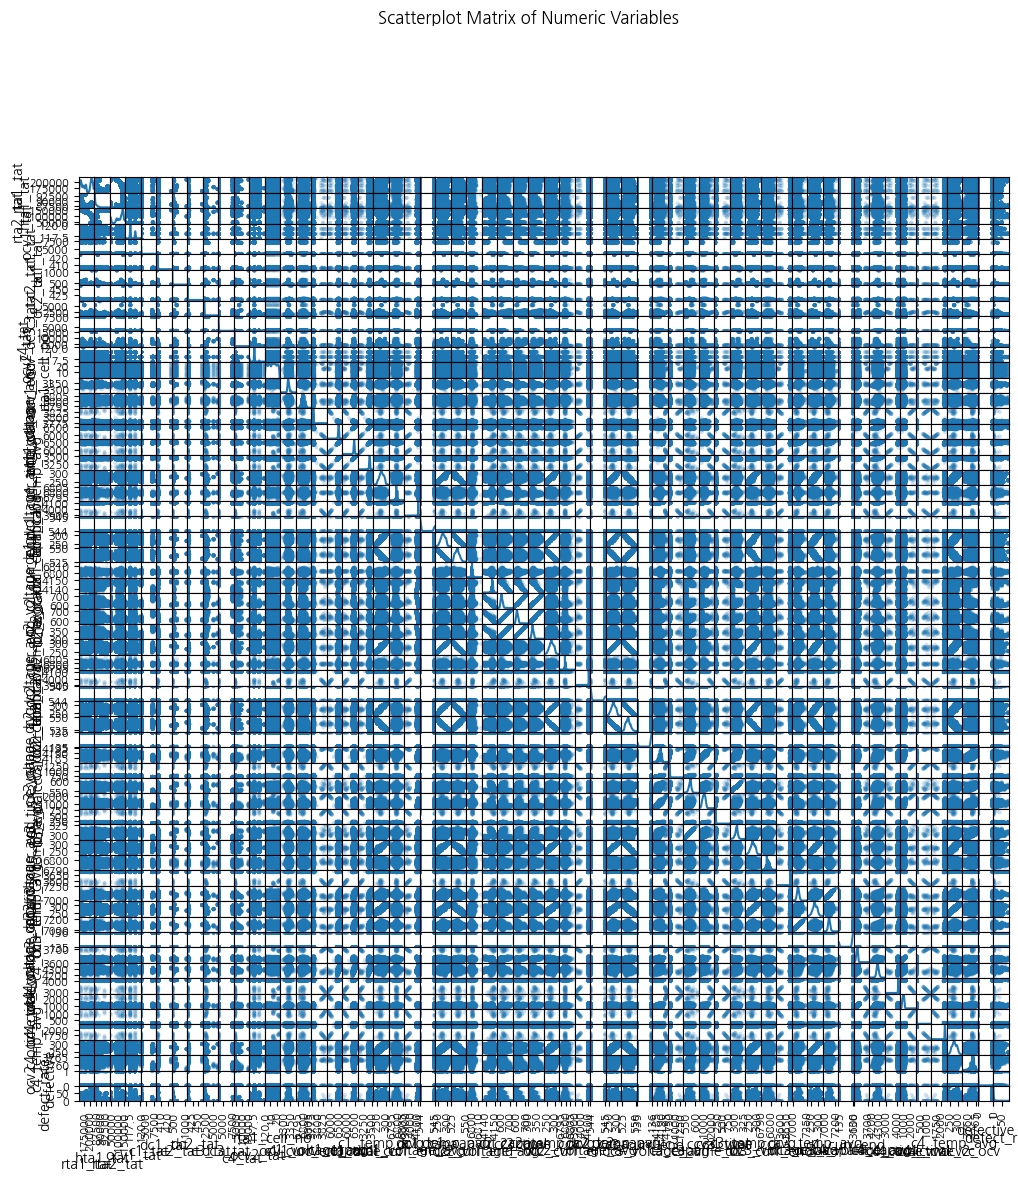

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 수치형 데이터만 선택
numeric_df = df_all.select_dtypes(include=['int64', 'float64'])

# 스캐터 플롯 행렬 시각화
scatter_matrix(numeric_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatterplot Matrix of Numeric Variables', y=1.02)
plt.show()